In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
# Importing the dataset
# 1. application transactions
application_txn = pd.read_csv('csv_utf8_application_txn.csv')
print(application_txn.describe())

/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


          sponsorid      artistid            exp           coin
count  2.639460e+05  1.686690e+05  716814.000000  716814.000000
mean   1.493216e+12  1.479089e+12       6.997722       6.128121
std    4.551081e+09  1.627913e+10      24.383469      75.568945
min    1.477035e+12  1.460953e+12       0.000000   -4000.000000
25%    1.494388e+12  1.460953e+12       0.000000       0.000000
50%    1.494388e+12  1.478771e+12       0.000000       0.000000
75%    1.494388e+12  1.494819e+12       5.000000       0.000000
max    1.498211e+12  1.500368e+12     500.000000   10000.000000


In [3]:
# 2. artistid
artist = pd.read_csv('csv_utf8_artist.csv')
print(artist.describe())

                _id
count  1.460000e+02
mean   1.474869e+12
std    1.585354e+10
min    1.460953e+12
25%    1.460973e+12
50%    1.461560e+12
75%    1.493052e+12
max    1.500368e+12


In [103]:
# 3. userid
user = pd.read_csv('csv_utf8_user2.csv')
print(user.describe())

        birth_year
count  1192.000000
mean   2534.251678
std       6.777531
min    2520.000000
25%    2530.000000
50%    2536.000000
75%    2539.000000
max    2545.000000


In [104]:
application_txn.head()

,userid,action,objecttype,objectid,ads_on_page,sponsorid,artistid,time_stamp2,exp,coin,timestamp
0,59391fbfe4b0a0f774fe022e,VIEW,MISSIONPAGE,1494491526872/1498239229913/1496144767898/1498...,NaN,NaN,NaN,2017-07-01 00:04:22.842,0,0,2017-07-01
1,592f8ddfe4b09c162d715525,VIEW,MISSIONPAGE,1498802539453/1498481977332/1498212249886/1498...,NaN,NaN,NaN,2017-07-01 00:35:59.743,0,0,2017-07-01
2,592e1c65e4b09c162d70ac5b,VIEW,MISSIONPAGE,1494491526872/1498217706019/1496144767898/1498...,NaN,NaN,NaN,2017-07-01 00:21:00.408,0,0,2017-07-01
3,5945552ee4b0db45c711c290,VIEW,MISSIONPAGE,1494491526872/1498239229913/1496144767898/1498...,NaN,NaN,NaN,2017-07-01 00:06:10.999,0,0,2017-07-01
4,593e4481e4b06f7fcb9eabe4,VIEW,FEEDPAGE,1495095167612/59567fdae4b0a6ba1750b8e0/59567cc...,NaN,NaN,NaN,2017-07-01 00:32:49.475,0,0,2017-07-01


# AGGREGATE DATA BY USERID -> CUSTOMER SEGMENTATION

In [105]:
#reindex application_txn based on userid
userid_txn = application_txn.iloc[:,0].values 
userid_txn_indexed = application_txn.set_index(['userid','action','objecttype']).sort_index()

In [106]:
userid_txn_indexed.head()

objectid ads_on_page  sponsorid  \
userid                   action objecttype                                   
592da01fe4b0a4ee112b84fb APPIN  NaN             NaN         NaN        NaN   
                                NaN             NaN         NaN        NaN   
                                NaN             NaN         NaN        NaN   
                                NaN             NaN         NaN        NaN   
                                NaN             NaN         NaN        NaN   

                                            artistid              time_stamp2  \
userid                   action objecttype                                      
592da01fe4b0a4ee112b84fb APPIN  NaN              NaN  2017-07-04 10:33:18.826   
                                NaN              NaN  2017-07-01 00:27:32.484   
                                NaN              NaN  2017-07-03 11:30:03.980   
                                NaN              NaN  2017-07-01 00:43:06.132   
                                NaN              NaN  2017-07-05 10:11:26.288   

                                            exp  coin   timestamp  
userid                   action objecttype                         
592da01fe4b0a4ee112b84fb APPIN  NaN           0     0  2017-07-04  
                                NaN           0     0  2017-07-01  
                                NaN           0     0  2017-07-03  
                                NaN           0     0  2017-07-01  
                                NaN           0     0  2017-07-05

In [107]:
userid_txn_indexed.loc['592da01fe4b0a4ee112b84fb']
print(len(userid_txn_indexed.loc['592da01fe4b0a4ee112b84fb']))

311


In [108]:
# how many users who did transactions
print(len(np.unique(application_txn.iloc[:,0].values)))

4379


In [109]:
# q1: how many actions per each user?
def calActions(userid):
    return (len(userid_txn_indexed.loc[userid]))
# get userid of all users, then calculate actions they took
userids = user.iloc[:,0].values # get all userid from user dataframe
numbers_user_actions =[] # np array to store list of actions of each user

for userid in userids:
    numbers_user_actions.append(calActions(userid))

# print(numbers_user_actions)
print(len(numbers_user_actions))
print(max(numbers_user_actions))
print(min(numbers_user_actions))   # some user just register but didn't do anything

4379
24815
1


In [110]:
user2=user
user2['no_actions']=numbers_user_actions
print(user2.head())

                     userid      name socialtype  gender  birth_year  \
0  59570d03e4b03f87dbd92df3  name1631   facebook  female      2538.0   
1  595737dbe4b0d5a5c805d59a  name1857   facebook    male      2542.0   
2  5951ced6e4b0db45c713648e  name1208   facebook  female      2539.0   
3  592fba08e4b09c162d716850   name272   facebook    male      2535.0   
4  592ec542e4b09c162d711422   name205   facebook  female      2538.0   

                 createdtm  no_actions  
0  2017-07-01 09:46:27.867         117  
1  2017-07-01 12:49:15.445         188  
2  2017-06-27 10:19:50.139         164  
3  2017-06-01 01:54:00.347        1000  
4  2017-05-31 08:29:38.226         284  


In [111]:
# q2: how many artists each user follows?

userid_txn_indexed.head()

objectid ads_on_page  sponsorid  \
userid                   action objecttype                                   
592da01fe4b0a4ee112b84fb APPIN  NaN             NaN         NaN        NaN   
                                NaN             NaN         NaN        NaN   
                                NaN             NaN         NaN        NaN   
                                NaN             NaN         NaN        NaN   
                                NaN             NaN         NaN        NaN   

                                            artistid              time_stamp2  \
userid                   action objecttype                                      
592da01fe4b0a4ee112b84fb APPIN  NaN              NaN  2017-07-04 10:33:18.826   
                                NaN              NaN  2017-07-01 00:27:32.484   
                                NaN              NaN  2017-07-03 11:30:03.980   
                                NaN              NaN  2017-07-01 00:43:06.132   
                                NaN              NaN  2017-07-05 10:11:26.288   

                                            exp  coin   timestamp  
userid                   action objecttype                         
592da01fe4b0a4ee112b84fb APPIN  NaN           0     0  2017-07-04  
                                NaN           0     0  2017-07-01  
                                NaN           0     0  2017-07-03  
                                NaN           0     0  2017-07-01  
                                NaN           0     0  2017-07-05

## q3: what are the actions they do?

In [112]:
#reindex application_txn based on userid
userid_txn = application_txn.iloc[:,0].values 
userid_txn_objecttype_indexed = application_txn.set_index(['userid','objecttype']).sort_index()
userid_txn_objecttype_indexed.head()

action       objectid ads_on_page  \
userid                   objecttype                                     
592da01fe4b0a4ee112b84fb ADSFEED      LIKE  1496307438423         NaN   
                         ADSFEED      LIKE  1496307438423         NaN   
                         ADSFEED      VIEW  1496543170777         NaN   
                         ADSFEED      VIEW  1496543170777         NaN   
                         ADSFEED      LIKE  1496543170777         NaN   

                                        sponsorid  artistid  \
userid                   objecttype                           
592da01fe4b0a4ee112b84fb ADSFEED     1.496482e+12       NaN   
                         ADSFEED     1.496482e+12       NaN   
                         ADSFEED     1.494313e+12       NaN   
                         ADSFEED     1.494313e+12       NaN   
                         ADSFEED     1.494313e+12       NaN   

                                                 time_stamp2  exp  coin  \
userid                   objecttype                                       
592da01fe4b0a4ee112b84fb ADSFEED     2017-07-04 00:05:19.260    9     0   
                         ADSFEED     2017-07-04 00:05:19.260    9     0   
                         ADSFEED     2017-07-04 11:27:22.986    0     0   
                         ADSFEED     2017-07-04 11:27:22.986    0     0   
                         ADSFEED     2017-07-04 11:27:24.931    5     0   

                                      timestamp  
userid                   objecttype              
592da01fe4b0a4ee112b84fb ADSFEED     2017-07-04  
                         ADSFEED     2017-07-04  
                         ADSFEED     2017-07-04  
                         ADSFEED     2017-07-04  
                         ADSFEED     2017-07-04

In [113]:
# print(userid_txn_objecttype_indexed.loc['592da01fe4b0a4ee112b84fb'].values)
userid = '592da01fe4b0a4ee112b84fb'
each_actions = []

def aggrateActions(userid):
    return (len(userid_txn_indexed.loc[userid]))

x = userid_txn_objecttype_indexed.loc['592da01fe4b0a4ee112b84fb'].values
# print(x[:,0])

unique_actions_by_user = np.unique(x[:,0])
# print(unique_actions_by_user)

#all actions available
all_actions = application_txn.iloc[:,1]
# print(all_actions)
unique_all_actions = np.unique(all_actions)
print(unique_all_actions)
print(len(unique_all_actions))

['APPIN' 'APPOUT' 'BONUS' 'CHECKIN' 'CLICK' 'COMMENT' 'COMPLETE'
 'DELETECOMMENT' 'ENDED' 'FAIL' 'FOLLOW' 'INCOMPLETE' 'JOIN' 'LIKE' 'LOGIN'
 'REDEEM_REQUEST' 'REGISTER_TEMP_USER' 'REGISTER_USER' 'SCORE_GAUGE'
 'SHARE' 'SPECIAL_INC' 'SUBMIT_REF_CODE' 'UNFOLLOW' 'UNLIKE' 'VIEW']
25


In [114]:
user2=user.copy()
user2['no_actions']=numbers_user_actions
print(user2.head())

                     userid      name socialtype  gender  birth_year  \
0  59570d03e4b03f87dbd92df3  name1631   facebook  female      2538.0   
1  595737dbe4b0d5a5c805d59a  name1857   facebook    male      2542.0   
2  5951ced6e4b0db45c713648e  name1208   facebook  female      2539.0   
3  592fba08e4b09c162d716850   name272   facebook    male      2535.0   
4  592ec542e4b09c162d711422   name205   facebook  female      2538.0   

                 createdtm  no_actions  
0  2017-07-01 09:46:27.867         117  
1  2017-07-01 12:49:15.445         188  
2  2017-06-27 10:19:50.139         164  
3  2017-06-01 01:54:00.347        1000  
4  2017-05-31 08:29:38.226         284  


In [115]:
#count each actions given userid
userid = '592da01fe4b0a4ee112b84fb'
x = userid_txn_indexed.loc['592da01fe4b0a4ee112b84fb', 'APPIN'].values
print(len(x))

#get number of each action column
for action in unique_all_actions:
    no_each_action = []
    for i,userid in enumerate(userids):
        try:
            x = userid_txn_indexed.loc[userid, action].values
            no_each_action.append(len(x))
        except:
            no_each_action.append(0)

#     print(no_each_action)
#     print(len(no_each_action))

    user2[action] = no_each_action

# finally we get user2 DF with actions column
print(user2.head())

32
                     userid      name socialtype  gender  birth_year  \
0  59570d03e4b03f87dbd92df3  name1631   facebook  female      2538.0   
1  595737dbe4b0d5a5c805d59a  name1857   facebook    male      2542.0   
2  5951ced6e4b0db45c713648e  name1208   facebook  female      2539.0   
3  592fba08e4b09c162d716850   name272   facebook    male      2535.0   
4  592ec542e4b09c162d711422   name205   facebook  female      2538.0   

                 createdtm  no_actions  APPIN  APPOUT  BONUS  ...   \
0  2017-07-01 09:46:27.867         117     11      10      0  ...    
1  2017-07-01 12:49:15.445         188     19      14      0  ...    
2  2017-06-27 10:19:50.139         164     10      11      0  ...    
3  2017-06-01 01:54:00.347        1000     58      61      0  ...    
4  2017-05-31 08:29:38.226         284     12      13      0  ...    

   REDEEM_REQUEST  REGISTER_TEMP_USER  REGISTER_USER  SCORE_GAUGE  SHARE  \
0               0                   0              1            0  

In [116]:
print(user2.columns)

Index(['userid', 'name', 'socialtype', 'gender', 'birth_year', 'createdtm',
       'no_actions', 'APPIN', 'APPOUT', 'BONUS', 'CHECKIN', 'CLICK', 'COMMENT',
       'COMPLETE', 'DELETECOMMENT', 'ENDED', 'FAIL', 'FOLLOW', 'INCOMPLETE',
       'JOIN', 'LIKE', 'LOGIN', 'REDEEM_REQUEST', 'REGISTER_TEMP_USER',
       'REGISTER_USER', 'SCORE_GAUGE', 'SHARE', 'SPECIAL_INC',
       'SUBMIT_REF_CODE', 'UNFOLLOW', 'UNLIKE', 'VIEW'],
      dtype='object')


# Plot USER DATA WITH ACTIONS COLUMN

In [117]:
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
print(cf.__version__)

tls.embed('https://plot.ly/~cufflinks/8')

df = cf.datagen.lines()

py.iplot([{
    'x': user2.index,
    'y': user2[col],
    'name': col
}  for col in ['no_actions', 'APPIN', 'APPOUT', 'BONUS', 'CHECKIN', 'CLICK', 'COMMENT',
       'COMPLETE', 'DELETECOMMENT', 'ENDED', 'FAIL', 'FOLLOW', 'INCOMPLETE',
       'JOIN', 'LIKE', 'LOGIN', 'REDEEM_REQUEST', 'REGISTER_TEMP_USER',
       'REGISTER_USER', 'SCORE_GAUGE', 'SHARE', 'SPECIAL_INC',
       'SUBMIT_REF_CODE', 'UNFOLLOW', 'UNLIKE', 'VIEW']], filename='cufflinks/simple-line')

0.12.0
The draw time for this plot will be slow for all clients.


/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [118]:
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
print(cf.__version__)

tls.embed('https://plot.ly/~cufflinks/8')

df = cf.datagen.lines()

py.iplot([{
    'x': user2.index,
    'y': user2[col],
    'name': col
}  for col in ['APPIN', 'APPOUT', 'BONUS', 'CHECKIN', 'CLICK', 'COMMENT',
       'COMPLETE', 'DELETECOMMENT', 'ENDED', 'FAIL', 'FOLLOW', 'INCOMPLETE',
       'JOIN', 'LIKE', 'LOGIN', 'REDEEM_REQUEST', 'REGISTER_TEMP_USER',
       'REGISTER_USER', 'SCORE_GAUGE', 'SHARE', 'SPECIAL_INC',
       'SUBMIT_REF_CODE', 'UNFOLLOW', 'UNLIKE', 'VIEW']], filename='cufflinks/simple-line')

0.12.0
The draw time for this plot will be slow for all clients.


/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [119]:
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
print(cf.__version__)

tls.embed('https://plot.ly/~cufflinks/8')

df = cf.datagen.lines()

py.iplot([{
    'x': user2.index,
    'y': user2[col],
    'name': col
}  for col in ['VIEW','LIKE', 'CLICK', 'JOIN', 'SCORE_GAUGE', 'FOLLOW', 'COMPLETE', 'SHARE']], filename='cufflinks/simple-line')

0.12.0
The draw time for this plot will be slow for clients without much RAM.


/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



## q4: what objects they went 




In [120]:
print(user2.head())

                     userid      name socialtype  gender  birth_year  \
0  59570d03e4b03f87dbd92df3  name1631   facebook  female      2538.0   
1  595737dbe4b0d5a5c805d59a  name1857   facebook    male      2542.0   
2  5951ced6e4b0db45c713648e  name1208   facebook  female      2539.0   
3  592fba08e4b09c162d716850   name272   facebook    male      2535.0   
4  592ec542e4b09c162d711422   name205   facebook  female      2538.0   

                 createdtm  no_actions  APPIN  APPOUT  BONUS  ...   \
0  2017-07-01 09:46:27.867         117     11      10      0  ...    
1  2017-07-01 12:49:15.445         188     19      14      0  ...    
2  2017-06-27 10:19:50.139         164     10      11      0  ...    
3  2017-06-01 01:54:00.347        1000     58      61      0  ...    
4  2017-05-31 08:29:38.226         284     12      13      0  ...    

   REDEEM_REQUEST  REGISTER_TEMP_USER  REGISTER_USER  SCORE_GAUGE  SHARE  \
0               0                   0              1            0     

In [121]:
#reindex application_txn based on userid
userid_txn = application_txn.iloc[:,0].values 
userid_txn_objecttype_indexed = application_txn.set_index(['userid','objecttype']).sort_index()
userid_txn_objecttype_indexed.head()

action       objectid ads_on_page  \
userid                   objecttype                                     
592da01fe4b0a4ee112b84fb ADSFEED      LIKE  1496307438423         NaN   
                         ADSFEED      LIKE  1496307438423         NaN   
                         ADSFEED      VIEW  1496543170777         NaN   
                         ADSFEED      VIEW  1496543170777         NaN   
                         ADSFEED      LIKE  1496543170777         NaN   

                                        sponsorid  artistid  \
userid                   objecttype                           
592da01fe4b0a4ee112b84fb ADSFEED     1.496482e+12       NaN   
                         ADSFEED     1.496482e+12       NaN   
                         ADSFEED     1.494313e+12       NaN   
                         ADSFEED     1.494313e+12       NaN   
                         ADSFEED     1.494313e+12       NaN   

                                                 time_stamp2  exp  coin  \
userid                   objecttype                                       
592da01fe4b0a4ee112b84fb ADSFEED     2017-07-04 00:05:19.260    9     0   
                         ADSFEED     2017-07-04 00:05:19.260    9     0   
                         ADSFEED     2017-07-04 11:27:22.986    0     0   
                         ADSFEED     2017-07-04 11:27:22.986    0     0   
                         ADSFEED     2017-07-04 11:27:24.931    5     0   

                                      timestamp  
userid                   objecttype              
592da01fe4b0a4ee112b84fb ADSFEED     2017-07-04  
                         ADSFEED     2017-07-04  
                         ADSFEED     2017-07-04  
                         ADSFEED     2017-07-04  
                         ADSFEED     2017-07-04

In [122]:
#all objecttypes available
all_objecttypes = application_txn.iloc[:,2]
# print(all_objecttypes)
unique_all_objecttypes = ['ADSFEED','ADSVIDEO', 'ARTIST_RANK', 'ARTIST_WEEKLY_RANK', 'EXCLUSIVE',
 'EXCLUSIVEPAGE', 'FEEDPAGE' ,'FEEDPAGE_UNOFFICIAL' ,'MISSIONPAGE',
 'REWARDPAGE', 'TOTAL_RANK' ,'TOTAL_WEEKLY_RANK', 'VIDEO', 'VIDEOPAGE',
 'VIDEOPAGE_UNOFFICIAL','MISSION','FEED','PRIZE']
print(unique_all_objecttypes)
print(len(unique_all_objecttypes))

['ADSFEED', 'ADSVIDEO', 'ARTIST_RANK', 'ARTIST_WEEKLY_RANK', 'EXCLUSIVE', 'EXCLUSIVEPAGE', 'FEEDPAGE', 'FEEDPAGE_UNOFFICIAL', 'MISSIONPAGE', 'REWARDPAGE', 'TOTAL_RANK', 'TOTAL_WEEKLY_RANK', 'VIDEO', 'VIDEOPAGE', 'VIDEOPAGE_UNOFFICIAL', 'MISSION', 'FEED', 'PRIZE']
18


In [123]:
#count each actions given userid
userid = '592da01fe4b0a4ee112b84fb'
x = userid_txn_objecttype_indexed.loc['592da01fe4b0a4ee112b84fb', 'ADSFEED'].values
print(len(x))

#get number of each action column
for objecttype in unique_all_objecttypes:
    no_each_action = []
    for i,userid in enumerate(userids):
        try:
            x = userid_txn_objecttype_indexed.loc[userid, objecttype].values
            no_each_action.append(len(x))
        except:
            no_each_action.append(0)

    print(no_each_action)
    print(len(no_each_action))

    user2[objecttype] = no_each_action

# finally we get user2 DF with actions column
print(user2.head())

38


/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning:

indexing past lexsort depth may impact performance.

/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/ipykernel_launcher.py:11: PerformanceWarning:

indexing past lexsort depth may impact performance.



[0, 0, 0, 18, 4, 4, 0, 0, 0, 8, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 2, 18, 4, 0, 8, 0, 0, 0, 14, 0, 4, 0, 0, 0, 0, 0, 8, 0, 0, 4, 16, 0, 0, 0, 2, 10, 0, 2, 0, 0, 4, 0, 6, 0, 0, 4, 0, 22, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 22, 4, 0, 0, 0, 0, 12, 6, 0, 4, 0, 0, 0, 0, 40, 0, 0, 0, 6, 0, 0, 10, 0, 0, 8, 0, 0, 0, 6, 64, 0, 0, 0, 0, 0, 0, 18, 2, 12, 0, 14, 40, 0, 0, 0, 6, 0, 0, 14, 4, 0, 12, 4, 0, 26, 0, 0, 0, 0, 2, 34, 12, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 16, 12, 0, 4, 0, 0, 18, 16, 0, 6, 0, 0, 10, 6, 0, 24, 0, 2, 0, 0, 0, 18, 0, 4, 0, 0, 24, 4, 0, 10, 0, 6, 2, 14, 4, 4, 16, 0, 0, 20, 10, 0, 16, 106, 0, 36, 0, 0, 2, 0, 0, 6, 10, 12, 0, 0, 12, 6, 28, 0, 2, 4, 0, 4, 0, 12, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 12, 10, 0, 0, 156, 0, 0, 0, 0, 0, 0, 0, 0, 12, 2, 0, 0, 0, 26, 2, 4, 10, 0, 0, 28, 4, 0, 8, 18, 86, 0, 22, 38, 20, 0, 4, 0, 0, 0, 0, 0, 4, 2, 26, 6, 0, 0, 20, 0, 4, 0, 0, 0, 4, 4, 0, 32, 0, 0, 42, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 14, 4, 4, 0, 24, 4, 6, 22, 20, 0, 10, 0, 4, 0,

[0, 0, 0, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2038, 0, 0, 0, 0, 0, 6, 0, 44, 2364, 0, 4, 0, 0, 6, 0, 40, 0, 0, 0, 0, 0, 0, 0, 32, 0, 16, 0, 0, 4, 4, 0, 12, 46, 0, 3078, 8, 0, 0, 0, 8, 0, 0, 6, 0, 3142, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 58, 0, 0, 0, 0, 0, 18, 12, 6, 0, 0, 0, 4, 4, 108, 0, 0, 0, 8, 0, 0, 14, 0, 0, 0, 0, 0, 0, 36, 2744, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 16, 198, 0, 0, 0, 12, 0, 0, 4, 6, 0, 0, 0, 0, 0, 0, 74, 14, 0, 0, 120, 2, 92, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 16, 0, 0, 0, 0, 0, 8, 2, 0, 0, 4, 0, 30, 6, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 136, 0, 70, 0, 4360, 0, 2, 0, 0, 0, 6, 0, 0, 0, 334, 0, 4, 0, 20, 0, 690, 0, 0, 14, 0, 0, 0, 410, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 6, 0, 24, 0, 0, 24, 0, 0, 0, 0, 0, 0, 4, 0, 6, 0, 0, 40, 0, 0, 0, 0, 482, 0, 0, 6, 0, 0, 0, 0, 0, 0, 6, 48, 26, 0, 0, 0, 0, 0, 0, 4, 26, 2, 1750, 140, 20, 0, 210, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 2, 0, 18, 0, 0, 0, 22, 0, 0, 2, 0, 0, 0, 8, 0, 0, 2, 0, 0, 0, 0, 4, 12, 134, 124, 0, 

[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 148, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 6, 12, 0, 2, 0, 1, 0, 0, 8, 0, 0, 0, 0, 16, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 59, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 5, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 9, 0, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 314, 10, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 2, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 148, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 40, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0, 0, 0, 4, 221, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 12, 0, 0, 0, 49, 0, 0, 0, 5, 0, 0, 0, 7, 0, 1, 2, 0, 0, 2, 0, 0, 0, 6, 28, 0, 2, 0, 1, 0, 0, 8, 0, 2, 0, 0, 10, 0, 0, 0, 3, 4, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 13, 0, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 35, 0, 0, 0, 82, 5, 7, 0, 26, 0, 0, 0, 51, 0, 0, 0, 0, 0, 6, 2, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 9, 0, 0, 0, 2, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 252, 0, 397, 10, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 6, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 2, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 6, 1, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 4, 16, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 5, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 7, 2, 0, 0, 3, 7, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 17, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 20, 0, 4, 0, 1, 0, 2, 0, 0, 0, 9, 3, 0, 0, 11, 0, 1, 0, 0, 5, 0, 0, 0, 15, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 2, 11, 21, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 

[0, 2, 2, 5, 11, 9, 0, 0, 1, 2, 1, 0, 0, 0, 1, 13, 1, 1, 1, 0, 2, 7, 2, 16, 11, 0, 1, 5, 21, 6, 2, 13, 6, 0, 1, 2, 3, 1, 0, 23, 2, 1, 3, 0, 2, 1, 0, 13, 21, 2, 71, 1, 2, 5, 0, 4, 2, 0, 4, 5, 24, 1, 2, 14, 1, 4, 1, 0, 0, 21, 2, 1, 0, 1, 0, 8, 8, 100, 5, 2, 6, 1, 0, 13, 7, 7, 3, 3, 2, 2, 0, 29, 0, 0, 11, 8, 0, 1, 6, 0, 1, 30, 1, 4, 1, 17, 15, 1, 5, 5, 1, 0, 1, 58, 9, 4, 2, 4, 39, 0, 1, 3, 48, 7, 0, 16, 24, 0, 0, 0, 0, 8, 1, 2, 6, 0, 0, 11, 12, 18, 1, 8, 0, 0, 5, 2, 1, 1, 7, 18, 20, 1, 3, 6, 0, 3, 7, 1, 3, 0, 1, 0, 2, 4, 0, 44, 8, 0, 2, 1, 1, 21, 3, 1, 2, 11, 16, 12, 0, 64, 8, 6, 13, 5, 8, 8, 6, 2, 6, 12, 11, 4, 3, 25, 0, 46, 0, 0, 6, 1, 0, 1, 8, 1, 0, 1, 30, 3, 57, 1, 0, 6, 1, 1, 0, 10, 0, 0, 7, 1, 0, 3, 1, 5, 0, 8, 5, 20, 2, 2, 3, 0, 4, 1, 1, 2, 0, 0, 2, 2, 11, 2, 1, 7, 4, 4, 4, 3, 1, 0, 2, 23, 3, 1, 2, 26, 13, 18, 39, 9, 1, 3, 0, 4, 1, 0, 2, 5, 4, 59, 5, 2, 9, 3, 29, 14, 5, 0, 5, 15, 36, 0, 53, 1, 16, 49, 3, 1, 1, 4, 1, 0, 0, 7, 0, 2, 6, 5, 0, 2, 2, 5, 1, 74, 2, 13, 0, 1, 5, 1, 5, 0, 2

[0, 1, 6, 10, 18, 15, 0, 0, 3, 6, 1, 1, 0, 2, 1, 19, 2, 3, 6, 1, 4, 5, 4, 22, 53, 14, 2, 14, 29, 3, 2, 16, 11, 3, 1, 3, 4, 0, 2, 27, 2, 1, 20, 3, 2, 5, 0, 20, 15, 5, 105, 2, 6, 5, 0, 7, 3, 2, 8, 5, 24, 3, 6, 15, 3, 4, 1, 1, 1, 35, 4, 5, 1, 2, 1, 13, 3, 105, 12, 14, 9, 1, 0, 17, 18, 7, 4, 7, 4, 2, 1, 21, 0, 1, 6, 15, 3, 2, 4, 0, 1, 52, 2, 4, 0, 21, 54, 2, 5, 8, 6, 1, 5, 63, 7, 9, 3, 9, 33, 1, 2, 5, 70, 7, 2, 76, 18, 1, 2, 7, 1, 13, 6, 21, 8, 2, 1, 13, 18, 21, 3, 18, 1, 3, 5, 3, 3, 2, 11, 38, 83, 13, 7, 8, 2, 4, 17, 4, 4, 2, 1, 2, 3, 11, 4, 86, 9, 13, 1, 3, 4, 25, 4, 3, 2, 34, 23, 21, 1, 278, 6, 13, 14, 51, 10, 13, 6, 2, 8, 11, 46, 4, 11, 29, 2, 141, 1, 1, 32, 3, 0, 3, 28, 47, 3, 8, 28, 18, 296, 1, 5, 6, 3, 1, 1, 24, 7, 1, 10, 1, 1, 3, 4, 6, 1, 9, 19, 48, 7, 2, 20, 1, 4, 0, 8, 2, 2, 1, 3, 9, 12, 4, 8, 4, 18, 13, 11, 6, 2, 0, 4, 23, 4, 0, 4, 38, 12, 17, 59, 5, 1, 3, 0, 2, 0, 1, 2, 7, 6, 108, 26, 3, 6, 5, 34, 18, 5, 1, 10, 10, 39, 0, 25, 4, 18, 81, 4, 2, 0, 5, 0, 3, 2, 25, 3, 9, 11, 16, 2,

[0, 1, 5, 5, 4, 14, 0, 0, 3, 5, 1, 1, 0, 1, 1, 13, 2, 3, 2, 1, 1, 5, 2, 3, 1, 13, 2, 12, 23, 2, 2, 13, 9, 3, 2, 3, 2, 0, 2, 12, 2, 1, 19, 3, 2, 5, 0, 11, 14, 3, 5, 1, 6, 1, 0, 4, 1, 1, 2, 0, 9, 2, 3, 2, 3, 0, 1, 1, 1, 15, 4, 5, 1, 2, 1, 2, 5, 1, 9, 12, 3, 1, 0, 6, 14, 1, 1, 5, 4, 2, 1, 6, 0, 0, 3, 10, 1, 0, 2, 0, 0, 7, 2, 3, 0, 6, 51, 1, 1, 1, 3, 1, 4, 9, 2, 9, 3, 3, 22, 1, 1, 5, 14, 7, 1, 71, 15, 1, 2, 0, 0, 1, 5, 2, 2, 2, 1, 12, 15, 1, 3, 1, 1, 3, 4, 1, 4, 2, 10, 13, 4, 13, 6, 4, 1, 2, 14, 3, 4, 2, 0, 1, 2, 11, 3, 25, 7, 13, 1, 3, 5, 20, 4, 2, 2, 29, 8, 19, 1, 138, 5, 7, 2, 49, 6, 12, 5, 2, 7, 4, 46, 1, 3, 25, 1, 93, 1, 1, 11, 2, 0, 3, 6, 54, 1, 3, 25, 6, 6, 1, 3, 0, 3, 1, 1, 2, 3, 1, 9, 0, 1, 2, 3, 4, 1, 5, 20, 31, 6, 2, 5, 1, 4, 0, 2, 1, 2, 1, 3, 1, 10, 2, 8, 4, 18, 2, 1, 1, 1, 0, 3, 19, 2, 0, 1, 34, 1, 16, 6, 4, 1, 3, 0, 2, 0, 1, 1, 2, 6, 38, 26, 2, 0, 3, 11, 3, 2, 1, 8, 10, 3, 0, 22, 3, 4, 18, 3, 1, 0, 5, 0, 1, 1, 21, 1, 9, 6, 6, 2, 2, 1, 1, 3, 2, 6, 21, 2, 11, 2, 2, 5, 1, 7, 1, 

[19, 29, 27, 149, 51, 126, 3, 19, 19, 25, 12, 18, 59, 17, 3, 383, 23, 8, 50, 3, 19, 39, 23, 190, 529, 95, 58, 56, 78, 36, 17, 106, 37, 27, 6, 32, 19, 38, 15, 210, 19, 23, 135, 58, 7, 9, 1, 158, 133, 24, 423, 30, 26, 49, 11, 117, 17, 10, 157, 21, 515, 23, 70, 140, 20, 19, 6, 21, 9, 99, 12, 9, 37, 4, 22, 162, 32, 266, 68, 63, 41, 9, 10, 115, 43, 182, 13, 65, 71, 7, 8, 253, 10, 26, 39, 39, 27, 31, 72, 8, 7, 215, 21, 18, 3, 106, 841, 21, 89, 39, 38, 29, 23, 243, 70, 57, 53, 144, 306, 15, 16, 23, 374, 45, 20, 396, 127, 8, 33, 49, 27, 147, 36, 121, 79, 8, 9, 136, 130, 186, 26, 187, 5, 12, 23, 17, 16, 12, 95, 201, 305, 97, 15, 30, 4, 19, 90, 47, 24, 13, 43, 28, 67, 53, 64, 259, 77, 99, 8, 7, 51, 166, 18, 18, 15, 258, 251, 107, 8, 1347, 62, 75, 45, 173, 69, 63, 30, 55, 40, 225, 205, 74, 199, 335, 11, 401, 8, 22, 247, 5, 9, 25, 245, 44, 29, 32, 206, 243, 475, 9, 40, 63, 10, 2, 31, 265, 41, 4, 205, 11, 61, 13, 58, 19, 7, 117, 48, 234, 28, 14, 133, 19, 37, 2, 23, 71, 70, 13, 26, 59, 38, 15, 11, 4

[0, 3, 10, 5, 18, 25, 1, 2, 19, 4, 0, 0, 0, 0, 1, 5, 5, 4, 0, 2, 7, 1, 0, 14, 3, 3, 2, 43, 12, 10, 9, 58, 2, 4, 1, 19, 3, 0, 0, 20, 16, 0, 18, 1, 0, 3, 0, 28, 24, 0, 114, 2, 9, 0, 0, 4, 4, 1, 1, 7, 18, 9, 1, 13, 3, 4, 3, 0, 0, 27, 9, 4, 0, 2, 0, 5, 18, 124, 56, 20, 8, 2, 0, 4, 6, 2, 8, 34, 0, 1, 0, 6, 0, 0, 25, 2, 0, 1, 3, 0, 1, 45, 5, 12, 1, 27, 40, 1, 4, 5, 6, 0, 7, 90, 0, 11, 0, 4, 58, 0, 3, 7, 157, 9, 8, 91, 26, 0, 0, 0, 0, 2, 0, 2, 18, 0, 0, 30, 71, 12, 11, 1, 0, 0, 15, 6, 0, 2, 0, 21, 12, 2, 18, 0, 0, 3, 18, 0, 18, 0, 3, 0, 0, 12, 3, 31, 22, 0, 2, 6, 0, 26, 16, 0, 5, 77, 10, 36, 0, 220, 11, 1, 33, 21, 5, 4, 13, 15, 20, 3, 18, 0, 2, 119, 0, 19, 0, 0, 3, 1, 0, 8, 0, 2, 1, 0, 92, 0, 40, 1, 2, 11, 6, 2, 0, 11, 0, 1, 0, 0, 0, 4, 0, 6, 0, 6, 11, 3, 3, 1, 1, 2, 19, 6, 0, 1, 1, 0, 3, 0, 23, 6, 2, 26, 7, 2, 5, 0, 0, 0, 0, 51, 5, 7, 2, 25, 19, 17, 10, 19, 6, 5, 0, 6, 7, 0, 0, 0, 16, 30, 2, 4, 0, 1, 44, 18, 9, 4, 16, 28, 47, 0, 128, 1, 12, 12, 0, 0, 4, 12, 4, 0, 0, 24, 0, 3, 0, 0, 1, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 21, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 28, 0, 0, 0, 14, 1, 0, 19, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 30, 0, 6, 0, 3, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 0, 5, 0, 21, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 115, 0, 0, 1, 0, 0, 1, 1, 6, 0, 1, 0, 0, 1, 0, 0, 8, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 2, 0, 4, 5, 0, 73, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 7, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 12, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 31, 0, 0, 0, 10, 3, 0, 21, 2, 0, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 6, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 58, 1, 7, 0, 289, 0, 0, 5, 17, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 2, 6, 0, 22, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 11, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 3, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 13, 0, 0, 0, 45, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 3, 0, 6, 11, 10, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 8, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

[0, 2, 0, 75, 0, 77, 0, 0, 0, 0, 8, 0, 4, 6, 0, 1267, 0, 0, 3, 0, 0, 8, 0, 70, 1244, 51, 38, 0, 6, 11, 8, 87, 0, 0, 0, 0, 0, 8, 0, 21, 0, 3, 22, 66, 1, 6, 0, 97, 40, 0, 901, 3, 0, 6, 0, 29, 0, 0, 46, 0, 2512, 0, 9, 9, 9, 0, 0, 0, 0, 44, 0, 0, 0, 0, 0, 22, 22, 93, 0, 1, 0, 0, 0, 0, 1, 46, 0, 0, 48, 1, 0, 107, 0, 0, 0, 17, 0, 12, 5, 0, 0, 5, 0, 0, 0, 64, 1662, 0, 0, 0, 0, 0, 0, 51, 0, 2, 8, 25, 84, 0, 7, 0, 21, 0, 0, 53, 69, 0, 6, 10, 0, 9, 34, 42, 38, 0, 0, 122, 18, 107, 0, 47, 0, 0, 8, 0, 0, 0, 9, 0, 12, 1, 0, 0, 0, 0, 13, 13, 2, 0, 30, 0, 22, 13, 12, 81, 1, 9, 0, 0, 0, 54, 0, 0, 0, 107, 26, 89, 0, 2237, 52, 16, 0, 48, 10, 14, 1, 0, 0, 284, 3, 20, 1, 65, 0, 525, 0, 0, 33, 0, 0, 30, 322, 0, 0, 0, 50, 43, 66, 0, 4, 0, 0, 0, 12, 51, 0, 0, 4, 0, 6, 0, 1, 0, 0, 47, 0, 5, 0, 0, 32, 0, 18, 0, 0, 230, 0, 0, 34, 0, 0, 0, 2, 2, 64, 6, 87, 58, 0, 0, 16, 2, 0, 8, 22, 27, 25, 889, 101, 21, 0, 166, 0, 1, 0, 0, 0, 0, 0, 54, 0, 0, 8, 0, 69, 9, 0, 1, 17, 14, 17, 0, 75, 0, 51, 29, 13, 0, 0, 214, 0, 0, 0

[0, 0, 0, 4, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 1, 0, 0, 0, 2, 0, 4, 3, 0, 1, 0, 11, 0, 0, 13, 3, 2, 0, 0, 0, 0, 0, 42, 0, 0, 0, 0, 1, 55, 0, 1, 320, 0, 222, 0, 0, 0, 0, 0, 0, 0, 2, 0, 23, 0, 2, 0, 0, 0, 8, 0, 0, 0, 0, 52, 0, 0, 0, 0, 8, 5, 21, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 0, 0, 47, 38, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 25, 0, 0, 0, 1, 3, 0, 1, 27, 0, 0, 0, 0, 2, 0, 27, 0, 0, 0, 12, 4, 0, 0, 0, 0, 0, 0, 0, 82, 0, 0, 0, 0, 1, 0, 0, 0, 0, 65, 0, 0, 26, 0, 0, 3, 4, 0, 91, 0, 0, 0, 1, 0, 12, 0, 0, 2, 19, 0, 0, 0, 62, 13, 2, 7, 0, 0, 0, 13, 0, 0, 11, 3, 0, 0, 15, 0, 11, 0, 0, 5, 0, 0, 0, 27, 0, 0, 4, 1, 0, 30, 0, 0, 0, 1, 0, 0, 18, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 21, 2, 10, 13, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 0, 0, 16, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 7, 16, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 130, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 18, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 53, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[70, 110, 84, 368, 72, 422, 10, 62, 46, 90, 52, 14, 248, 80, 20, 604, 62, 16, 102, 10, 16, 120, 52, 266, 558, 266, 214, 146, 198, 132, 48, 394, 96, 28, 18, 102, 44, 114, 46, 304, 58, 70, 312, 212, 14, 18, 6, 224, 288, 40, 410, 22, 80, 108, 38, 224, 20, 30, 302, 34, 684, 54, 164, 256, 104, 16, 8, 52, 20, 166, 18, 16, 142, 16, 48, 320, 122, 286, 184, 166, 56, 22, 30, 76, 72, 310, 8, 180, 222, 26, 12, 390, 38, 84, 104, 122, 34, 66, 134, 50, 6, 282, 72, 48, 6, 218, 4802, 38, 208, 48, 78, 60, 64, 320, 96, 144, 102, 226, 514, 48, 32, 48, 460, 96, 60, 542, 402, 24, 120, 150, 50, 312, 172, 216, 138, 20, 24, 520, 378, 366, 72, 368, 10, 42, 48, 30, 22, 36, 172, 272, 344, 318, 42, 44, 6, 36, 256, 146, 42, 30, 98, 24, 164, 130, 130, 298, 192, 194, 16, 32, 90, 382, 50, 56, 28, 438, 244, 346, 26, 748, 204, 150, 30, 334, 162, 186, 48, 186, 62, 412, 576, 126, 336, 754, 6, 536, 30, 72, 430, 4, 36, 128, 268, 52, 56, 28, 468, 402, 580, 18, 130, 86, 14, 6, 106, 418, 112, 8, 254, 22, 110, 42, 140, 30, 18, 

[0, 0, 3, 157, 51, 5, 0, 0, 1, 37, 0, 0, 0, 0, 0, 464, 0, 1, 19, 0, 5, 5, 1, 146, 397, 22, 10, 59, 83, 0, 0, 32, 2, 0, 0, 0, 0, 0, 2, 12, 0, 0, 11, 33, 1, 24, 0, 24, 28, 2, 4, 1, 1, 0, 0, 9, 2, 0, 0, 0, 1178, 3, 0, 0, 1, 0, 2, 0, 0, 11, 3, 0, 0, 1, 0, 85, 0, 654, 3, 6, 0, 0, 0, 21, 19, 0, 0, 7, 3, 13, 0, 116, 0, 0, 1, 55, 0, 7, 16, 0, 0, 38, 0, 35, 0, 93, 3864, 0, 0, 8, 0, 0, 0, 286, 14, 156, 0, 161, 104, 0, 0, 0, 74, 10, 0, 32, 0, 0, 31, 429, 2, 25, 17, 17, 3, 0, 1, 187, 2, 895, 0, 14, 0, 3, 1, 2, 7, 1, 13, 32, 289, 61, 20, 16, 1, 0, 74, 47, 0, 32, 0, 0, 0, 24, 0, 1120, 2, 4, 0, 1, 1, 252, 1, 1, 0, 11, 47, 473, 0, 1076, 10, 12, 2, 419, 22, 12, 8, 0, 4, 97, 197, 5, 82, 577, 0, 3528, 1, 0, 288, 0, 0, 16, 79, 58, 0, 2, 164, 25, 3537, 0, 30, 23, 5, 6, 0, 161, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 1, 0, 0, 82, 0, 1, 0, 3, 0, 0, 0, 2, 0, 12, 0, 85, 0, 156, 4, 72, 20, 0, 0, 216, 94, 0, 18, 55, 442, 0, 166, 1046, 312, 0, 28, 0, 1, 0, 0, 0, 14, 9, 150, 621, 0, 2, 98, 3, 283, 2, 1, 56, 3, 16, 0, 2

[0, 0, 4, 20, 7, 13, 0, 0, 12, 1, 0, 2, 0, 0, 0, 32, 1, 0, 0, 1, 2, 0, 1, 1, 30, 9, 0, 36, 19, 6, 0, 46, 0, 0, 0, 12, 0, 0, 0, 56, 10, 1, 11, 0, 0, 1, 0, 32, 22, 2, 47, 1, 6, 16, 0, 2, 3, 0, 10, 0, 133, 6, 11, 2, 1, 0, 0, 3, 1, 1, 3, 2, 0, 0, 4, 44, 2, 5, 36, 25, 3, 1, 0, 2, 0, 20, 16, 25, 4, 0, 0, 62, 0, 0, 7, 0, 2, 7, 7, 0, 0, 28, 2, 0, 0, 4, 16, 3, 5, 0, 2, 0, 4, 19, 2, 10, 0, 3, 90, 0, 3, 4, 173, 1, 6, 91, 31, 0, 0, 0, 0, 14, 3, 1, 12, 0, 0, 32, 69, 8, 6, 18, 0, 0, 28, 2, 3, 0, 5, 21, 13, 3, 8, 1, 0, 3, 6, 5, 12, 0, 2, 0, 17, 11, 18, 4, 25, 0, 0, 2, 3, 23, 9, 0, 2, 61, 70, 20, 0, 321, 9, 17, 10, 12, 5, 4, 6, 10, 10, 20, 25, 12, 16, 70, 0, 40, 0, 0, 26, 0, 0, 5, 5, 2, 3, 8, 52, 13, 124, 0, 1, 9, 2, 2, 0, 17, 5, 0, 10, 2, 3, 0, 5, 0, 0, 14, 5, 19, 0, 0, 34, 2, 19, 3, 0, 0, 0, 0, 0, 0, 8, 3, 0, 19, 14, 4, 45, 4, 1, 0, 2, 27, 0, 2, 6, 28, 32, 3, 29, 19, 4, 0, 0, 3, 4, 2, 2, 35, 4, 22, 2, 2, 8, 4, 28, 3, 22, 2, 9, 25, 9, 0, 105, 1, 2, 43, 1, 2, 1, 2, 1, 0, 0, 28, 2, 0, 6, 4, 0, 0, 2, 9,

In [128]:
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
print(cf.__version__)

tls.embed('https://plot.ly/~cufflinks/8')

df = cf.datagen.lines()

py.iplot([{
    'x': user2.index,
    'y': user2[col],
    'name': col
}  for col in ['ADSFEED', 'ADSVIDEO', 'ARTIST_RANK', 'ARTIST_WEEKLY_RANK', 'EXCLUSIVE', 
               'EXCLUSIVEPAGE', 'FEEDPAGE', 'FEEDPAGE_UNOFFICIAL', 'MISSIONPAGE', 'REWARDPAGE',
               'TOTAL_RANK', 'TOTAL_WEEKLY_RANK', 'VIDEO', 'VIDEOPAGE', 'VIDEOPAGE_UNOFFICIAL', 
               'MISSION', 'FEED', 'PRIZE']], filename='cufflinks/simple-line')

0.12.0
The draw time for this plot will be slow for all clients.


/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [125]:
print(user2.head())

                     userid      name socialtype  gender  birth_year  \
0  59570d03e4b03f87dbd92df3  name1631   facebook  female      2538.0   
1  595737dbe4b0d5a5c805d59a  name1857   facebook    male      2542.0   
2  5951ced6e4b0db45c713648e  name1208   facebook  female      2539.0   
3  592fba08e4b09c162d716850   name272   facebook    male      2535.0   
4  592ec542e4b09c162d711422   name205   facebook  female      2538.0   

                 createdtm  no_actions  APPIN  APPOUT  BONUS  ...    \
0  2017-07-01 09:46:27.867         117     11      10      0  ...     
1  2017-07-01 12:49:15.445         188     19      14      0  ...     
2  2017-06-27 10:19:50.139         164     10      11      0  ...     
3  2017-06-01 01:54:00.347        1000     58      61      0  ...     
4  2017-05-31 08:29:38.226         284     12      13      0  ...     

   MISSIONPAGE  REWARDPAGE  TOTAL_RANK  TOTAL_WEEKLY_RANK  VIDEO  VIDEOPAGE  \
0           19           0           0                  0    

# DATA PREPROCESSING

In [160]:
# print(user2.iloc[:,4])

X = user2.iloc[:, 4].values
print(X)
print(len(X))
print(X[:])

# step3: Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 1) #
imputer = imputer.fit(X[:])
X[:] = imputer.transform(X[:])
X = X.astype(int)
# print(X)
# print(len(X))
user2['birth_year_mod'] = X
# print(user2['birth_year_mod'])

[ 2538.          2542.          2539.         ...,  2534.25167785
  2534.25167785  2534.25167785]
4379
[ 2538.          2542.          2539.         ...,  2534.25167785
  2534.25167785  2534.25167785]


/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



In [161]:
#backup data
user3 = user2.copy()

In [166]:
user2 = user2.drop('birth_year', axis=1)

In [167]:
user2 = user2.drop('socialtype', axis=1)

In [ ]:
user2 = user2.drop('createdtm', axis=1)

In [177]:
print(user2.head())

                     userid      name  gender  no_actions  APPIN  APPOUT  \
0  59570d03e4b03f87dbd92df3  name1631  female         117     11      10   
1  595737dbe4b0d5a5c805d59a  name1857    male         188     19      14   
2  5951ced6e4b0db45c713648e  name1208  female         164     10      11   
3  592fba08e4b09c162d716850   name272    male        1000     58      61   
4  592ec542e4b09c162d711422   name205  female         284     12      13   

   BONUS  CHECKIN  CLICK  COMMENT       ...        REWARDPAGE  TOTAL_RANK  \
0      0        0     26        0       ...                 0           0   
1      0        0     42        0       ...                 3           0   
2      0        0     34        0       ...                10           0   
3      0        0    132        0       ...                 5           0   
4      0        0     46        0       ...                18           0   

   TOTAL_WEEKLY_RANK  VIDEO  VIDEOPAGE  VIDEOPAGE_UNOFFICIAL  MISSION  FEED  \
0

In [182]:
user_for_clustering = user2.copy()
print(user_for_clustering.head())
user_for_clustering = user_for_clustering.drop('gender', axis=1)
user_for_clustering = user_for_clustering.drop('name', axis=1)
user_for_clustering = user_for_clustering.drop('userid', axis=1)

                     userid      name  gender  no_actions  APPIN  APPOUT  \
0  59570d03e4b03f87dbd92df3  name1631  female         117     11      10   
1  595737dbe4b0d5a5c805d59a  name1857    male         188     19      14   
2  5951ced6e4b0db45c713648e  name1208  female         164     10      11   
3  592fba08e4b09c162d716850   name272    male        1000     58      61   
4  592ec542e4b09c162d711422   name205  female         284     12      13   

   BONUS  CHECKIN  CLICK  COMMENT       ...        REWARDPAGE  TOTAL_RANK  \
0      0        0     26        0       ...                 0           0   
1      0        0     42        0       ...                 3           0   
2      0        0     34        0       ...                10           0   
3      0        0    132        0       ...                 5           0   
4      0        0     46        0       ...                18           0   

   TOTAL_WEEKLY_RANK  VIDEO  VIDEOPAGE  VIDEOPAGE_UNOFFICIAL  MISSION  FEED  \
0

In [183]:
print(user_for_clustering.head())

   no_actions  APPIN  APPOUT  BONUS  CHECKIN  CLICK  COMMENT  COMPLETE  \
0         117     11      10      0        0     26        0         6   
1         188     19      14      0        0     42        0        14   
2         164     10      11      0        0     34        0        16   
3        1000     58      61      0        0    132        0        46   
4         284     12      13      0        0     46        0        13   

   DELETECOMMENT  ENDED       ...        REWARDPAGE  TOTAL_RANK  \
0              0      0       ...                 0           0   
1              0      0       ...                 3           0   
2              0      0       ...                10           0   
3              0      0       ...                 5           0   
4              0      0       ...                18           0   

   TOTAL_WEEKLY_RANK  VIDEO  VIDEOPAGE  VIDEOPAGE_UNOFFICIAL  MISSION  FEED  \
0                  0      0          0                     0       70    

In [184]:
user_for_clustering['birth_year_mod'] = 2560 - user_for_clustering['birth_year_mod']

In [185]:
print(user_for_clustering.head())

   no_actions  APPIN  APPOUT  BONUS  CHECKIN  CLICK  COMMENT  COMPLETE  \
0         117     11      10      0        0     26        0         6   
1         188     19      14      0        0     42        0        14   
2         164     10      11      0        0     34        0        16   
3        1000     58      61      0        0    132        0        46   
4         284     12      13      0        0     46        0        13   

   DELETECOMMENT  ENDED       ...        REWARDPAGE  TOTAL_RANK  \
0              0      0       ...                 0           0   
1              0      0       ...                 3           0   
2              0      0       ...                10           0   
3              0      0       ...                 5           0   
4              0      0       ...                18           0   

   TOTAL_WEEKLY_RANK  VIDEO  VIDEOPAGE  VIDEOPAGE_UNOFFICIAL  MISSION  FEED  \
0                  0      0          0                     0       70    

In [186]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [187]:
%matplotlib inline
plt.figure(figsize=(7,4))

In [194]:
print(user_for_clustering.head())

# Building and running your model

   no_actions  APPIN  APPOUT  BONUS  CHECKIN  CLICK  COMMENT  COMPLETE  \
0         117     11      10      0        0     26        0         6   
1         188     19      14      0        0     42        0        14   
2         164     10      11      0        0     34        0        16   
3        1000     58      61      0        0    132        0        46   
4         284     12      13      0        0     46        0        13   

   DELETECOMMENT  ENDED       ...        REWARDPAGE  TOTAL_RANK  \
0              0      0       ...                 0           0   
1              0      0       ...                 3           0   
2              0      0       ...                10           0   
3              0      0       ...                 5           0   
4              0      0       ...                18           0   

   TOTAL_WEEKLY_RANK  VIDEO  VIDEOPAGE  VIDEOPAGE_UNOFFICIAL  MISSION  FEED  \
0                  0      0          0                     0       70    

In [213]:
# Building and running your model
clustering = KMeans(n_clusters=3, random_state=1)
clustering.fit(user_for_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [214]:
print(len(clustering.labels_))
clustering.labels_
print(np.unique(clustering.labels_))

unique, counts = np.unique(clustering.labels_, return_counts=True)
print(unique, counts)

4379
[0 1 2]
[0 1 2] [  66 4308    5]


In [190]:
# Plotting your model outputs
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

In [223]:
print(user_for_clustering.index)

RangeIndex(start=0, stop=4379, step=1)


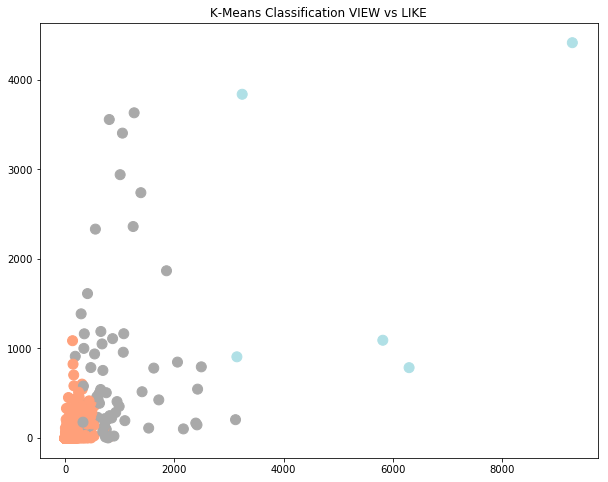

In [231]:
plt.figure(figsize=(10,8))
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

# plt.subplot(1,2,1)
# plt.scatter(x=user_for_clustering.iloc[:,41],y=user_for_clustering.iloc[:,42], c=color_theme[clustering.labels_], s=100)
# plt.title('K-Means Classification MISSION vs FEED')

# # plt.subplot(1,2,2)
# # plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
# # plt.title('K-Means Classification')

# plt.subplot(1,2,2)
plt.scatter(x=user_for_clustering.iloc[:,25],y=user_for_clustering.iloc[:,14], c=color_theme[clustering.labels_], s=100)
plt.title('K-Means Classification VIEW vs LIKE')

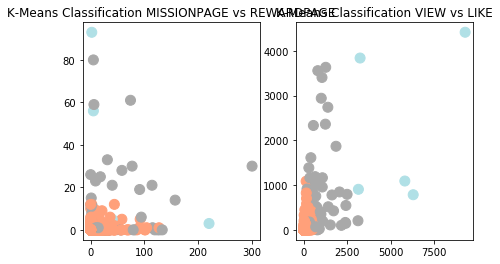

In [229]:
plt.figure(figsize=(7,4))
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=user_for_clustering.iloc[:,35],y=user_for_clustering.iloc[:,36], c=color_theme[clustering.labels_], s=100)
plt.title('K-Means Classification MISSIONPAGE vs REWARDPAGE')

# plt.subplot(1,2,2)
# plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
# plt.title('K-Means Classification')

plt.subplot(1,2,2)
plt.scatter(x=user_for_clustering.iloc[:,25],y=user_for_clustering.iloc[:,14], c=color_theme[clustering.labels_], s=100)
plt.title('K-Means Classification VIEW vs LIKE')

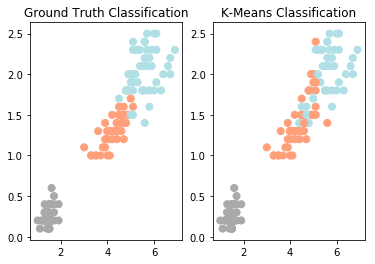

In [192]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

In [193]:
# Evaluate your clustering results
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



# END USERS ------------------------------------------------------------------------

# AGGREGATE DATA BY TIME

In [57]:
# get timestamp of transactions 
timestamp_txn = application_txn.iloc[:,7].values 
print(len(timestamp_txn))
print(type(timestamp_txn))

#convert timestamp to datetime object
dt_date_timestamp_txn = [pd.to_datetime(dt, format='%Y%m%d %H:%M:%S', errors='coerce').date() for dt in timestamp_txn]
print(dt_date_timestamp_txn)
# print(type(dt_timestamp_txn[0]))
# x = pd.to_datetime('2017-07-01 00:04:22.842', format='%Y%m%d %H:%M:%S')
# print(x)
# print(type(x))
# print(x.date())
# print(pd.to_datetime('13000101', format='%Y%m%d', errors='ignore'))

716814
<class 'numpy.ndarray'>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [64]:
print(type(dt_date_timestamp_txn))
print(np.unique(dt_date_timestamp_txn))
print(len(np.unique(dt_date_timestamp_txn)))
print(len(dt_date_timestamp_txn))

<class 'list'>
[datetime.date(2017, 7, 1) datetime.date(2017, 7, 2)
 datetime.date(2017, 7, 3) datetime.date(2017, 7, 4)
 datetime.date(2017, 7, 5) datetime.date(2017, 7, 6)
 datetime.date(2017, 7, 7) datetime.date(2017, 7, 8)
 datetime.date(2017, 7, 9) datetime.date(2017, 7, 10)
 datetime.date(2017, 7, 11) datetime.date(2017, 7, 12)
 datetime.date(2017, 7, 13) datetime.date(2017, 7, 14)
 datetime.date(2017, 7, 15) datetime.date(2017, 7, 16)
 datetime.date(2017, 7, 17) datetime.date(2017, 7, 18)
 datetime.date(2017, 7, 19) datetime.date(2017, 7, 20)
 datetime.date(2017, 7, 21) datetime.date(2017, 7, 22)
 datetime.date(2017, 7, 23) datetime.date(2017, 7, 24)
 datetime.date(2017, 7, 25)]
25
716814


In [65]:
application_txn['timestamp'] = dt_date_timestamp_txn
print(application_txn.tail())

                          userid action objecttype                  objectid  \
716809  592dbb1ee4b09c162d708eb8   LIKE       FEED  59773118e4b07ea3b56a606d   
716810  594bb773e4b0db45c7128ef1  CLICK    MISSION             1500630704911   
716811  594bb773e4b0db45c7128ef1  CLICK    MISSION             1500630704911   
716812  5975ff12e4b0d4cb4b85c9bc   JOIN    MISSION             1500544367558   
716813  5975ff12e4b0d4cb4b85c9bc   JOIN    MISSION             1500544367558   

       ads_on_page     sponsorid      artistid              time_stamp2  exp  \
716809         NaN           NaN  1.460953e+12  2017-07-25 21:41:14.960    6   
716810         NaN  1.494388e+12           NaN  2017-07-25 21:42:35.582    0   
716811         NaN  1.494388e+12           NaN  2017-07-25 21:42:35.582    0   
716812         NaN  1.494388e+12           NaN  2017-07-25 20:01:04.115    0   
716813         NaN  1.494388e+12           NaN  2017-07-25 20:01:04.115    0   

        coin   timestamp  
716809     

In [66]:
# aggregate transactions by date and then find out DAU (Daily Active User)
#reindex application_txn based on timestamp
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_indexed = application_txn.set_index(['timestamp','userid','action','objecttype']).sort_index()
print(application_txn_ts_indexed.iloc[0:1].values)

[[nan nan nan nan '2017-07-01 00:27:32.484' 0 0]]


In [67]:
application_txn_ts_indexed.head()

objectid ads_on_page  \
timestamp  userid                   action objecttype                        
2017-07-01 592da01fe4b0a4ee112b84fb APPIN  NaN             NaN         NaN   
                                           NaN             NaN         NaN   
                                           NaN             NaN         NaN   
                                           NaN             NaN         NaN   
                                           NaN             NaN         NaN   

                                                       sponsorid  artistid  \
timestamp  userid                   action objecttype                        
2017-07-01 592da01fe4b0a4ee112b84fb APPIN  NaN               NaN       NaN   
                                           NaN               NaN       NaN   
                                           NaN               NaN       NaN   
                                           NaN               NaN       NaN   
                                           NaN               NaN       NaN   

                                                                   time_stamp2  \
timestamp  userid                   action objecttype                            
2017-07-01 592da01fe4b0a4ee112b84fb APPIN  NaN         2017-07-01 00:27:32.484   
                                           NaN         2017-07-01 00:43:06.132   
                                           NaN         2017-07-01 00:32:46.578   
                                           NaN         2017-07-01 11:53:43.573   
                                           NaN         2017-07-01 11:53:52.654   

                                                       exp  coin  
timestamp  userid                   action objecttype             
2017-07-01 592da01fe4b0a4ee112b84fb APPIN  NaN           0     0  
                                           NaN           0     0  
                                           NaN           0     0  
                                           NaN           0     0  
                                           NaN           0     0

In [68]:
application_txn_ts_indexed.loc['2017-07-01'].values
print(len(application_txn_ts_indexed.loc['2017-07-01'].values))


100829


In [69]:
#find unique userid for daily active user
# print(application_txn_ts_indexed.loc['2017-07-01'].index.levels[1])
active_users = application_txn_ts_indexed.loc['2017-07-01'].index.levels[1]
print(active_users)
print(len(active_users))

active_users = application_txn_ts_indexed.loc['2017-07-01']
print(active_users.iloc[:,1])
# print(type(active_users))

Index(['592da01fe4b0a4ee112b84fb', '592da02be4b09c162d708589',
       '592da035e4b0a4ee112b8505', '592da070e4b09c162d70859a',
       '592da096e4b0a4ee112b852a', '592da0bae4b0a4ee112b8545',
       '592da122e4b09c162d708602', '592da13ce4b09c162d70862a',
       '592da3a2e4b0a4ee112b8618', '592da3a3e4b09c162d708691',
       ...
       '5977593ce4b0fe8edbc2cb8d', '597759b7e4b09713a27f183a',
       '59775a7ee4b0d4cb4b85f2bf', '597763e0e4b0fe8edbc2cdde',
       '597767a6e4b0a7427fcc824e', '597767b6e4b0d4cb4b85f56b',
       '5977681fe4b0d4cb4b85f586', '59776bdce4b0a7427fcc831a',
       '59776e2ce4b09713a27f1c44', '597772e1e4b0a7427fcc83d3'],
      dtype='object', name='userid', length=4379)
4379
timestamp   userid                    action              objecttype   
2017-07-01  592da01fe4b0a4ee112b84fb  APPIN               NaN              NaN
                                                          NaN              NaN
                                                          NaN            

# NEW TRY

In [70]:
# aggregate transactions by date and then find out DAU (Daily Active User)
#reindex application_txn based on timestamp
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_indexed = application_txn.set_index(['timestamp','action','objecttype']).sort_index()

In [71]:
application_txn_ts_indexed.head()

userid objectid ads_on_page  \
timestamp  action objecttype                                                  
2017-07-01 APPIN  NaN         59567fd8e4b0f93e9119cbf1      NaN         NaN   
                  NaN         592da691e4b0a4ee112b86bb      NaN         NaN   
                  NaN         592f9662e4b09c162d715ac3      NaN         NaN   
                  NaN         592f8edbe4b0a4ee112c5813      NaN         NaN   
                  NaN         592da691e4b0a4ee112b86bb      NaN         NaN   

                              sponsorid  artistid              time_stamp2  \
timestamp  action objecttype                                                 
2017-07-01 APPIN  NaN               NaN       NaN  2017-07-01 00:48:48.319   
                  NaN               NaN       NaN  2017-07-01 07:07:21.842   
                  NaN               NaN       NaN  2017-07-01 11:00:38.419   
                  NaN               NaN       NaN  2017-07-01 11:48:33.409   
                  NaN               NaN       NaN  2017-07-01 12:40:40.258   

                              exp  coin  
timestamp  action objecttype             
2017-07-01 APPIN  NaN           0     0  
                  NaN           0     0  
                  NaN           0     0  
                  NaN           0     0  
                  NaN           0     0

In [72]:
# defind method to return unique visitors each day
def uniqueVisitors(timestamp):
    action_APPIN = application_txn_ts_indexed.loc[timestamp,'APPIN'].values
    active_users_day1 = np.unique(action_APPIN[:,0])
    return len(active_users_day1)

# get all unique days
all_dates = np.unique(dt_date_timestamp_txn)
# print(type(dt_date_timestamp_txn))
# print(np.unique(dt_date_timestamp_txn))
# print(len(np.unique(dt_date_timestamp_txn)))
# print(len(dt_date_timestamp_txn))

daily_active_users =[] # np array to store daily active users
daily_active_users_percent =[] # np array to store % daily active users

for date in all_dates:
    daily_active_users.append(uniqueVisitors(date))
    daily_active_users_percent.append(int(uniqueVisitors(date))*100/4379)

print(len(daily_active_users))
print(max(daily_active_users))
print("{} %".format(max(daily_active_users_percent)))
print(min(daily_active_users))   
print("{} %".format(min(daily_active_users_percent)))
print(all_dates)
print(daily_active_users)
print(daily_active_users_percent)

25
1504
34.345741036766384 %
269
6.142955012559945 %
[datetime.date(2017, 7, 1) datetime.date(2017, 7, 2)
 datetime.date(2017, 7, 3) datetime.date(2017, 7, 4)
 datetime.date(2017, 7, 5) datetime.date(2017, 7, 6)
 datetime.date(2017, 7, 7) datetime.date(2017, 7, 8)
 datetime.date(2017, 7, 9) datetime.date(2017, 7, 10)
 datetime.date(2017, 7, 11) datetime.date(2017, 7, 12)
 datetime.date(2017, 7, 13) datetime.date(2017, 7, 14)
 datetime.date(2017, 7, 15) datetime.date(2017, 7, 16)
 datetime.date(2017, 7, 17) datetime.date(2017, 7, 18)
 datetime.date(2017, 7, 19) datetime.date(2017, 7, 20)
 datetime.date(2017, 7, 21) datetime.date(2017, 7, 22)
 datetime.date(2017, 7, 23) datetime.date(2017, 7, 24)
 datetime.date(2017, 7, 25)]
[1504, 521, 450, 448, 414, 448, 402, 370, 356, 269, 358, 352, 365, 339, 329, 347, 436, 396, 483, 423, 660, 614, 489, 378, 388]
[34.345741036766384, 11.897693537337291, 10.276318794245261, 10.230646266270838, 9.45421329070564, 10.230646266270838, 9.1801781228591, 8.44

In [ ]:
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
from scipy.stats import scoreatpercentile
from scipy.integrate import simps, trapz
%pylab inline

plt.figure(figsize=(15, 8))

# Plotting
plt.subplots_adjust(bottom=0.1)
plt.xticks(rotation=90)
ax=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax.xaxis.set_major_formatter(xfmt)
line1 = plt.plot(all_dates, daily_active_users, linewidth=2, label='DAU', c='b')
# plt.legend(loc='upper right')
# grid(line1, which='major', axis='both')

ax.set_ylabel('Daily Active User', weight='bold', color='g')
# ax.set_ylim(0,1.2)
# ax.set_yticks(np.arange(0,1.3,0.3))
# ax.set_xlim(min(time_to_plot),max(time_to_plot)+0.00027777777)
for tl in ax.get_yticklabels():
    tl.set_color('g')

# line2 -------------------------------------------------------------------
# brightness_ori = np.loadtxt(variables_to_plot[3], delimiter=',', usecols=(1,), skiprows=1, unpack=True, dtype=float)
# brightness_to_plot = brightness_ori[0:len(time_to_plot)]
# brightness_to_plot[64*3:244*3] = min_bri
ax1 = ax.twinx()
line2 = ax1.plot(all_dates, daily_active_users_percent, 'b-', linewidth=2, label='DAU_%')
# ax1.xaxis.set_major_formatter(xfmt)
   
ax1.set_ylabel('Daily Active User (%)', weight='bold',color='r')
# ax1.set_ylim(50,110)
# ax1.set_yticks(np.arange(50,120,10))
# ax1.set_xlim(min(time_to_plot),max(time_to_plot)+0.00027777777)
for tl in ax1.get_yticklabels():
    tl.set_color('r')

ax.set_xticks(all_dates, minor=True)

# plt.xticks(np.arange(0, len(all_dates), 1),
#           [ '0',  '1',  '2',  '3',  '4',  '5',  '6',  '7', '8',  '9', '10',
#            '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'])



#change xticks
# plt.xticks(np.arange(min(time_to_plot), max(time_to_plot)+0.00027777777, (max(time_to_plot)-min(time_to_plot))/6),
#           [ '12:00', '13:00', '14:00','15:00',
#           '16:00', '17:00', '18:00'])

# # Title
plt.title('Daily Active User')

#set legend
plt.legend(loc='best')

#change font size
# font = {'family' : 'sans-serif',
#         'weight' : 'bold',
#         'size'   : 20}

# plt.rc('font', **font)

#change image size
# plt.figure(figsize=(20, 10.5))
# fig = plt.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('Prtu_cool_temp.png', dpi=100)

In [73]:
data = userid_txn_indexed.loc['592da01fe4b0a4ee112b84fb','VIEW','ADSFEED'].values
data

array([['1496543170777', nan, 1494313137016.0, nan,
        '2017-07-04 11:27:22.986', 0, 0],
       ['1496543170777', nan, 1494313137016.0, nan,
        '2017-07-04 11:27:22.986', 0, 0],
       ['1498108295677', nan, 1494388191860.0, nan,
        '2017-07-04 00:21:30.131', 0, 0],
       ['1498108295677', nan, 1494388191860.0, nan,
        '2017-07-04 00:21:30.131', 0, 0],
       ['1498108295677', nan, 1494388191860.0, nan,
        '2017-07-04 00:21:19.703', 0, 0],
       ['1498108295677', nan, 1494388191860.0, nan,
        '2017-07-04 00:21:19.703', 0, 0],
       ['1495095167612', nan, 1494311648092.0, nan,
        '2017-07-04 00:12:40.987', 0, 0],
       ['1495095167612', nan, 1494311648092.0, nan,
        '2017-07-04 00:12:40.987', 0, 0],
       ['1496307438423', nan, 1496482082939.0, nan,
        '2017-07-04 00:05:16.819', 0, 0],
       ['1496307438423', nan, 1496482082939.0, nan,
        '2017-07-04 00:05:16.819', 0, 0],
       ['1498108295677', nan, 1494388191860.0, nan,
        

# What are the most popular actions each day 

In [74]:
#step1 what are the actions?
#find unique userid for daily active user
actions = np.unique(application_txn.iloc[:,1])
print(actions)
print(len(actions))

['APPIN' 'APPOUT' 'BONUS' 'CHECKIN' 'CLICK' 'COMMENT' 'COMPLETE'
 'DELETECOMMENT' 'ENDED' 'FAIL' 'FOLLOW' 'INCOMPLETE' 'JOIN' 'LIKE' 'LOGIN'
 'REDEEM_REQUEST' 'REGISTER_TEMP_USER' 'REGISTER_USER' 'SCORE_GAUGE'
 'SHARE' 'SPECIAL_INC' 'SUBMIT_REF_CODE' 'UNFOLLOW' 'UNLIKE' 'VIEW']
25


In [75]:
#step2: aggregate all actions being done each day
# aggregate transactions by date and then find out DAU (Daily Active User)
#reindex application_txn based on timestamp
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_indexed = application_txn.set_index(['timestamp','objecttype']).sort_index()
application_txn_ts_indexed.head()

userid action       objectid  \
timestamp  objecttype                                                   
2017-07-01 ADSFEED     592fafdce4b0a4ee112c66cc   LIKE  1498108295677   
           ADSFEED     592fafdce4b0a4ee112c66cc   LIKE  1498108295677   
           ADSFEED     595676a0e4b01cb1aa77713a  CLICK  1496149434454   
           ADSFEED     595676a0e4b01cb1aa77713a  CLICK  1496149434454   
           ADSFEED     59579f49e4b0f93e9119e2ef   LIKE  1498108295677   

                      ads_on_page     sponsorid  artistid  \
timestamp  objecttype                                       
2017-07-01 ADSFEED            NaN  1.494388e+12       NaN   
           ADSFEED            NaN  1.494388e+12       NaN   
           ADSFEED            NaN  1.494388e+12       NaN   
           ADSFEED            NaN  1.494388e+12       NaN   
           ADSFEED            NaN  1.494388e+12       NaN   

                                   time_stamp2  exp  coin  
timestamp  objecttype                                      
2017-07-01 ADSFEED     2017-07-01 08:55:34.641    7     0  
           ADSFEED     2017-07-01 08:55:34.641    7     0  
           ADSFEED     2017-07-01 18:25:10.996    0     0  
           ADSFEED     2017-07-01 18:25:10.996    0     0  
           ADSFEED     2017-07-01 20:22:30.409    9     0

In [76]:
#step3: get all rows of action for particular day
date='2017-07-01'
all_dates = np.unique(dt_date_timestamp_txn)
for date in all_dates:
    actions_each_day = application_txn_ts_indexed.loc[date,].values
    print("There are {} actions done on {}".format(len(actions_each_day),date))
    print("There are {} unique actions".format(len(np.unique(actions_each_day[:,1]))))
    print(np.unique(actions_each_day[:,1]))

There are 100829 actions done on 2017-07-01
There are 21 unique actions
['APPIN' 'APPOUT' 'BONUS' 'CLICK' 'COMMENT' 'COMPLETE' 'DELETECOMMENT'
 'FAIL' 'FOLLOW' 'INCOMPLETE' 'JOIN' 'LIKE' 'LOGIN' 'REDEEM_REQUEST'
 'REGISTER_TEMP_USER' 'REGISTER_USER' 'SCORE_GAUGE' 'SHARE' 'UNFOLLOW'
 'UNLIKE' 'VIEW']
There are 33297 actions done on 2017-07-02
There are 21 unique actions
['APPIN' 'APPOUT' 'BONUS' 'CLICK' 'COMMENT' 'COMPLETE' 'ENDED' 'FAIL'
 'FOLLOW' 'INCOMPLETE' 'JOIN' 'LIKE' 'LOGIN' 'REDEEM_REQUEST'
 'REGISTER_TEMP_USER' 'REGISTER_USER' 'SCORE_GAUGE' 'SHARE' 'UNFOLLOW'
 'UNLIKE' 'VIEW']
There are 31994 actions done on 2017-07-03
There are 20 unique actions
['APPIN' 'APPOUT' 'BONUS' 'CLICK' 'COMMENT' 'COMPLETE' 'FAIL' 'FOLLOW'
 'INCOMPLETE' 'JOIN' 'LIKE' 'LOGIN' 'REDEEM_REQUEST' 'REGISTER_TEMP_USER'
 'REGISTER_USER' 'SCORE_GAUGE' 'SHARE' 'UNFOLLOW' 'UNLIKE' 'VIEW']
There are 27731 actions done on 2017-07-04
There are 21 unique actions
['APPIN' 'APPOUT' 'BONUS' 'CLICK' 'COMMENT' 'COMPLETE

In [78]:
#step4: for each action aggregate numbers
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_indexed = application_txn.set_index(['timestamp','action']).sort_index()
application_txn_ts_action_indexed.head()

userid objecttype objectid ads_on_page  \
timestamp  action                                                             
2017-07-01 APPIN   59567fd8e4b0f93e9119cbf1        NaN      NaN         NaN   
           APPIN   592da691e4b0a4ee112b86bb        NaN      NaN         NaN   
           APPIN   592f9662e4b09c162d715ac3        NaN      NaN         NaN   
           APPIN   592f8edbe4b0a4ee112c5813        NaN      NaN         NaN   
           APPIN   592da691e4b0a4ee112b86bb        NaN      NaN         NaN   

                   sponsorid  artistid              time_stamp2  exp  coin  
timestamp  action                                                           
2017-07-01 APPIN         NaN       NaN  2017-07-01 00:48:48.319    0     0  
           APPIN         NaN       NaN  2017-07-01 07:07:21.842    0     0  
           APPIN         NaN       NaN  2017-07-01 11:00:38.419    0     0  
           APPIN         NaN       NaN  2017-07-01 11:48:33.409    0     0  
           APPIN         NaN       NaN  2017-07-01 12:40:40.258    0     0

In [ ]:
#step5: for each action aggregate numbers
date='2017-07-01'
actions_each_day = application_txn_ts_indexed.loc[date,].values
print("There are {} actions done on {}".format(len(actions_each_day),date))
print("There are {} unique actions".format(len(np.unique(actions_each_day[:,1]))))
print(np.unique(actions_each_day[:,1]))
unique_actions_each_day = np.unique(actions_each_day[:,1])

In [79]:
def numberOfActions(timestamp, action):
    action_APPIN = application_txn_ts_action_indexed.loc[timestamp,action].values
    return len(action_APPIN)

numbers_actions_day = []
date='2017-07-01'
aggregatetestpd = pd.DataFrame()
# print(date)
all_dates = np.unique(dt_date_timestamp_txn)
for date in all_dates:
    print(date)
    actions_each_day = application_txn_ts_indexed.loc[date,].values
    unique_actions_each_day = np.unique(actions_each_day[:,1])
    for action in unique_actions_each_day:
        numbers_actions_day.append(numberOfActions(date, action))

    #     print(numbers_actions_day)
    testpd = pd.DataFrame({'unique_actions': unique_actions_each_day, 'numbers_actions':numbers_actions_day})
    # print(testpd)
    print("total actions on {} is {}".format(date, sum(numbers_actions_day)))
    print(testpd.sort_index(by=['numbers_actions'], ascending=[False]))
    numbers_actions_day = []


2017-07-01
total actions on 2017-07-01 is 100829
    numbers_actions      unique_actions
20            31206                VIEW
3             16223               CLICK
0              9773               APPIN
1              9728              APPOUT
8              7420              FOLLOW
10             7408                JOIN
11             7217                LIKE
5              3605            COMPLETE
7              1906                FAIL
12             1751               LOGIN
16             1352         SCORE_GAUGE
17             1017               SHARE
15              918       REGISTER_USER
13              698      REDEEM_REQUEST
14              262  REGISTER_TEMP_USER
19              157              UNLIKE
18               79            UNFOLLOW
9                60          INCOMPLETE
4                28             COMMENT
2                20               BONUS
6                 1       DELETECOMMENT
2017-07-02


/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning:

by argument to sort_index is deprecated, pls use .sort_values(by=...)



total actions on 2017-07-02 is 33297
    numbers_actions      unique_actions
20            10109                VIEW
3              5402               CLICK
11             4937                LIKE
10             3122                JOIN
0              2138               APPIN
1              1832              APPOUT
5              1448            COMPLETE
8              1231              FOLLOW
7              1160                FAIL
16              807         SCORE_GAUGE
13              286      REDEEM_REQUEST
12              238               LOGIN
17              229               SHARE
19              132              UNLIKE
18               64            UNFOLLOW
15               62       REGISTER_USER
9                34          INCOMPLETE
14               31  REGISTER_TEMP_USER
2                20               BONUS
6                10               ENDED
4                 5             COMMENT
2017-07-03
total actions on 2017-07-03 is 31994
    numbers_actions      unique_act

total actions on 2017-07-16 is 16108
    numbers_actions      unique_actions
20             5146                VIEW
11             2635                LIKE
3              1582               CLICK
0              1307               APPIN
1              1208              APPOUT
16             1205         SCORE_GAUGE
10             1106                JOIN
5               514            COMPLETE
17              421               SHARE
8               410              FOLLOW
7               230                FAIL
9               166          INCOMPLETE
12               57               LOGIN
19               37              UNLIKE
18               31            UNFOLLOW
15               21       REGISTER_USER
2                20               BONUS
14                7  REGISTER_TEMP_USER
13                2      REDEEM_REQUEST
4                 2             COMMENT
6                 1       DELETECOMMENT
2017-07-17
total actions on 2017-07-17 is 23947
    numbers_actions      unique_act

2017-07-01
total actions on 2017-07-01 is 100829
2017-07-02
total actions on 2017-07-02 is 33297
2017-07-03
total actions on 2017-07-03 is 31994
2017-07-04
total actions on 2017-07-04 is 27731
2017-07-05
total actions on 2017-07-05 is 24793
2017-07-06
total actions on 2017-07-06 is 30456
2017-07-07
total actions on 2017-07-07 is 23159
2017-07-08
total actions on 2017-07-08 is 19152
2017-07-09
total actions on 2017-07-09 is 17068
2017-07-10
total actions on 2017-07-10 is 15215
2017-07-11
total actions on 2017-07-11 is 20634
2017-07-12
total actions on 2017-07-12 is 19621
2017-07-13
total actions on 2017-07-13 is 21813
2017-07-14
total actions on 2017-07-14 is 17304
2017-07-15
total actions on 2017-07-15 is 14937
2017-07-16
total actions on 2017-07-16 is 16108
2017-07-17
total actions on 2017-07-17 is 23947
2017-07-18
total actions on 2017-07-18 is 20891
2017-07-19
total actions on 2017-07-19 is 27411
2017-07-20
total actions on 2017-07-20 is 27154
2017-07-21
total actions on 2017-07-21 

/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).




2017-07-22
total actions on 2017-07-22 is 39026
2017-07-23
total actions on 2017-07-23 is 27204
2017-07-24
total actions on 2017-07-24 is 34469
2017-07-25
total actions on 2017-07-25 is 36740


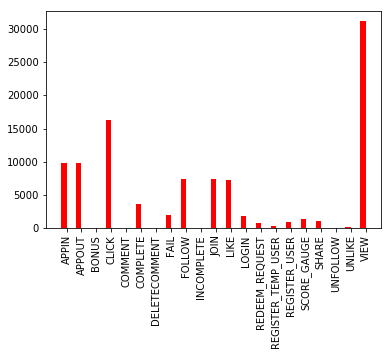

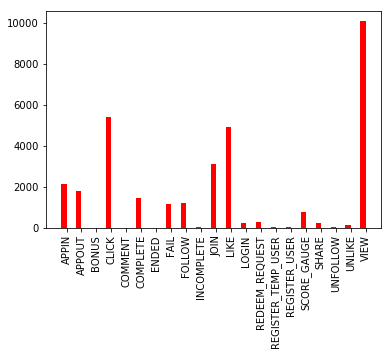

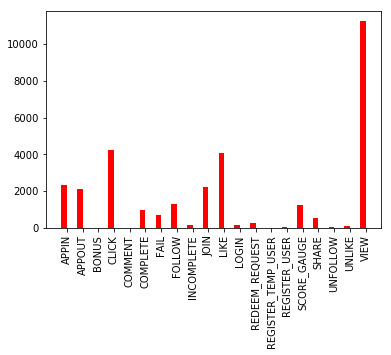

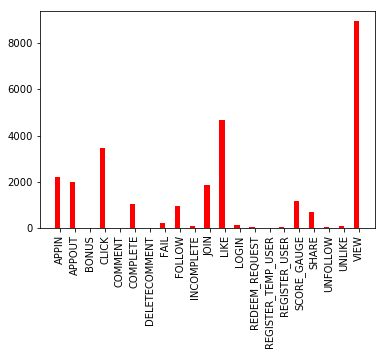

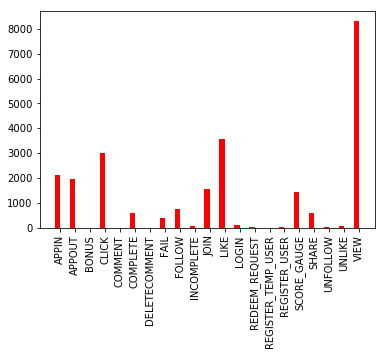

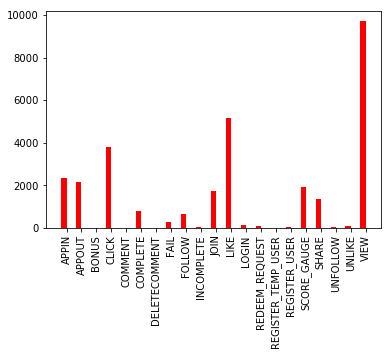

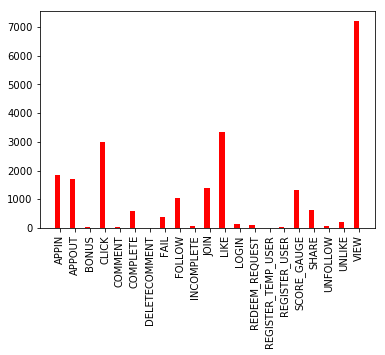

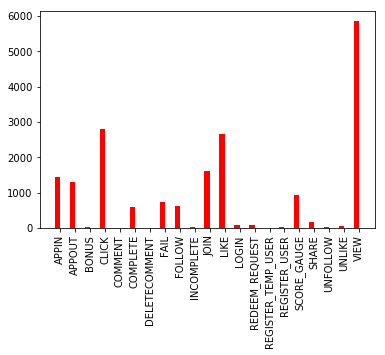

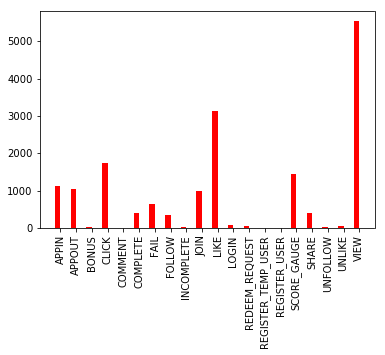

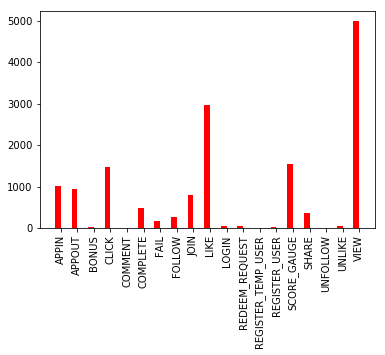

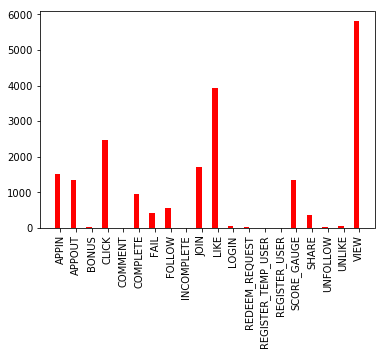

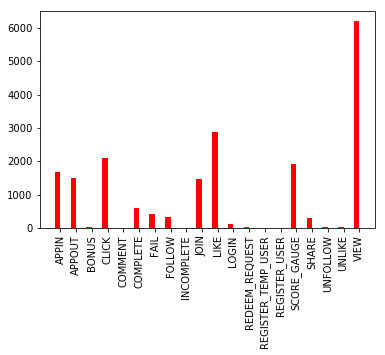

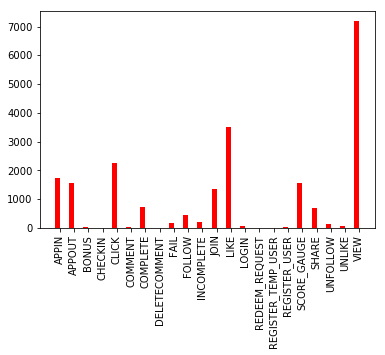

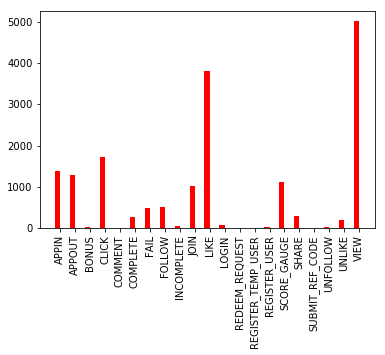

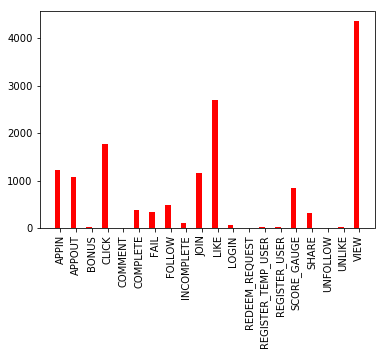

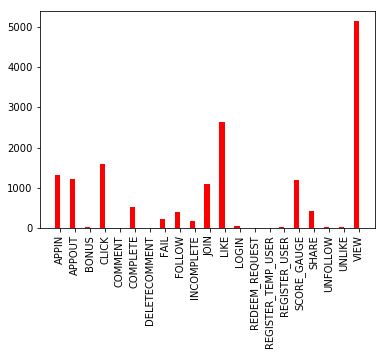

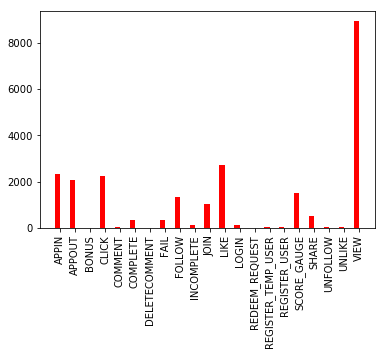

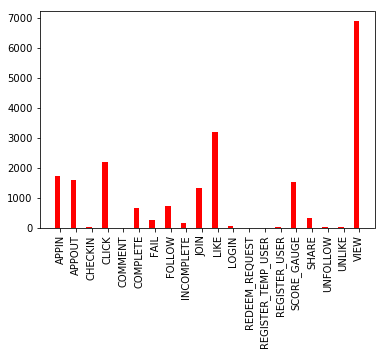

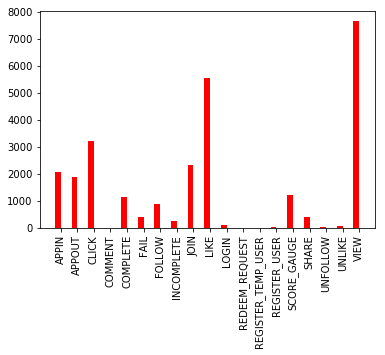

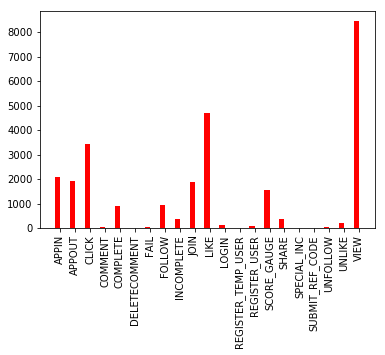

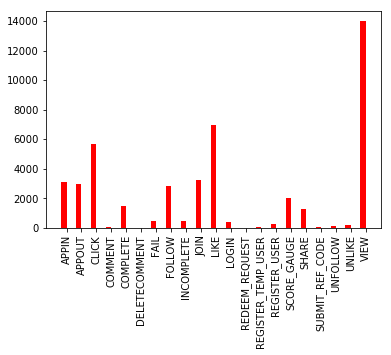

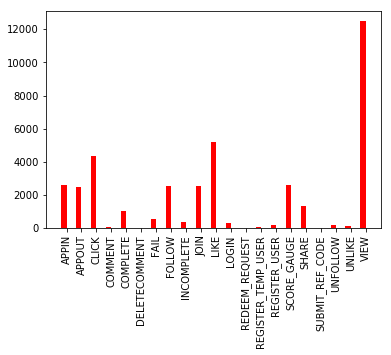

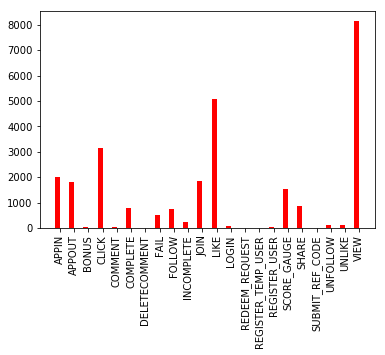

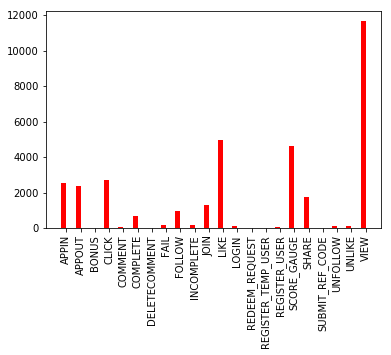

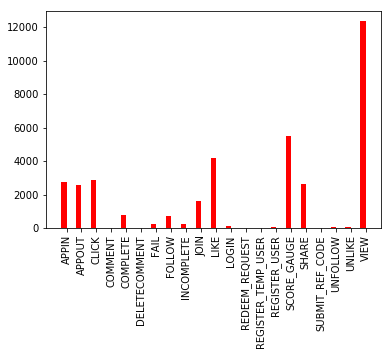

In [80]:
#step6: plot to visulize data 

import numpy as np
import matplotlib.pyplot as plt

numbers_actions_day = []
# date='2017-07-01'
# print(date)
all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    actions_each_day = application_txn_ts_indexed.loc[date,].values
    unique_actions_each_day = np.unique(actions_each_day[:,1])
    for action in unique_actions_each_day:
        numbers_actions_day.append(numberOfActions(date, action))

    #     print(numbers_actions_day)
    testpd = pd.DataFrame(unique_actions_each_day, numbers_actions_day)
#     print(testpd)
    print("total actions on {} is {}".format(date, sum(numbers_actions_day)))

    ind = np.arange(len(numbers_actions_day))  # the x locations for the groups
    width = 0.35       # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, numbers_actions_day, width, color='r')
    plt.xticks(rotation=90)

    # women_means = (25, 32, 34, 20, 25)
    # women_std = (3, 5, 2, 3, 3)
    # rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

    # add some text for labels, title and axes ticks
    # ax.set_ylabel('Scores')
    # ax.set_title('Scores by group and gender')

    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(unique_actions_each_day)
#     print(unique_actions_each_day)
    
    numbers_actions_day = []

# ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

# What are the most popular actions all days

In [81]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_action_userid_indexed = application_txn.set_index(['action','userid']).sort_index()
application_txn_action_userid_indexed.head()

objecttype objectid ads_on_page  sponsorid  \
action userid                                                                
APPIN  592da01fe4b0a4ee112b84fb        NaN      NaN         NaN        NaN   
       592da01fe4b0a4ee112b84fb        NaN      NaN         NaN        NaN   
       592da01fe4b0a4ee112b84fb        NaN      NaN         NaN        NaN   
       592da01fe4b0a4ee112b84fb        NaN      NaN         NaN        NaN   
       592da01fe4b0a4ee112b84fb        NaN      NaN         NaN        NaN   

                                 artistid              time_stamp2  exp  coin  \
action userid                                                                   
APPIN  592da01fe4b0a4ee112b84fb       NaN  2017-07-04 10:33:18.826    0     0   
       592da01fe4b0a4ee112b84fb       NaN  2017-07-01 00:27:32.484    0     0   
       592da01fe4b0a4ee112b84fb       NaN  2017-07-03 11:30:03.980    0     0   
       592da01fe4b0a4ee112b84fb       NaN  2017-07-01 00:43:06.132    0     0   
       592da01fe4b0a4ee112b84fb       NaN  2017-07-05 10:11:26.288    0     0   

                                  timestamp  
action userid                                
APPIN  592da01fe4b0a4ee112b84fb  2017-07-04  
       592da01fe4b0a4ee112b84fb  2017-07-01  
       592da01fe4b0a4ee112b84fb  2017-07-03  
       592da01fe4b0a4ee112b84fb  2017-07-01  
       592da01fe4b0a4ee112b84fb  2017-07-05

In [82]:
#step2: aggregate all actions
unique_actions = np.unique(actions)
numbers_actions = []

def numberOfActionsAll(action):
    no_each_action = application_txn_action_userid_indexed.loc[action].values
    return len(no_each_action)

for action in unique_actions:
    numbers_actions.append(numberOfActionsAll(action))
    
testpd = pd.DataFrame({'unique_actions': unique_actions, 'numbers_actions':numbers_actions})
print(testpd.sort_index(by=['numbers_actions'], ascending=[False])) 

    numbers_actions      unique_actions
24           227600                VIEW
13           103829                LIKE
4             86956               CLICK
0             56462               APPIN
1             52487              APPOUT
12            47676                JOIN
18            43323         SCORE_GAUGE
10            29064              FOLLOW
6             21922            COMPLETE
19            17916               SHARE
9             11638                FAIL
14             4724               LOGIN
11             3686          INCOMPLETE
23             2342              UNLIKE
17             2090       REGISTER_USER
15             1856      REDEEM_REQUEST
22             1436            UNFOLLOW
16              727  REGISTER_TEMP_USER
5               486             COMMENT
2               400               BONUS
21              128     SUBMIT_REF_CODE
3                31             CHECKIN
7                24       DELETECOMMENT
8                10               ENDED


/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning:

by argument to sort_index is deprecated, pls use .sort_values(by=...)



In [83]:
#step3: plot
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

In [84]:
tls.set_credentials_file(username='kwarodom', api_key='ljMtxORMkyx0JmiDwIyT')

In [85]:
data = [go.Bar(x=testpd['unique_actions'].values,y=testpd['numbers_actions'].values)]
print(data)

[{'type': 'bar', 'x': array(['APPIN', 'APPOUT', 'BONUS', 'CHECKIN', 'CLICK', 'COMMENT',
       'COMPLETE', 'DELETECOMMENT', 'ENDED', 'FAIL', 'FOLLOW',
       'INCOMPLETE', 'JOIN', 'LIKE', 'LOGIN', 'REDEEM_REQUEST',
       'REGISTER_TEMP_USER', 'REGISTER_USER', 'SCORE_GAUGE', 'SHARE',
       'SPECIAL_INC', 'SUBMIT_REF_CODE', 'UNFOLLOW', 'UNLIKE', 'VIEW'], dtype=object), 'y': array([ 56462,  52487,    400,     31,  86956,    486,  21922,     24,
           10,  11638,  29064,   3686,  47676, 103829,   4724,   1856,
          727,   2090,  43323,  17916,      1,    128,   1436,   2342,
       227600])}]


In [86]:
title="ACTIONS BY ALL USERS FROM 2017-07-01 to 2017-07-25"
layout = go.Layout(title=title,
             xaxis = dict(title='ACTIONS'),
             yaxis = dict(title='#ACTIONS'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar-chart')

# Most people action : View -> Like -> Click -> Score_Guage on which Object?
## In other words -> what are they trying to do?

# 1.VIEW

In [87]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_userid_indexed = application_txn.set_index(['timestamp','action','userid']).sort_index()
application_txn_ts_action_userid_indexed.head()

objecttype objectid ads_on_page  \
timestamp  action userid                                                     
2017-07-01 APPIN  592da01fe4b0a4ee112b84fb        NaN      NaN         NaN   
                  592da01fe4b0a4ee112b84fb        NaN      NaN         NaN   
                  592da01fe4b0a4ee112b84fb        NaN      NaN         NaN   
                  592da01fe4b0a4ee112b84fb        NaN      NaN         NaN   
                  592da01fe4b0a4ee112b84fb        NaN      NaN         NaN   

                                            sponsorid  artistid  \
timestamp  action userid                                          
2017-07-01 APPIN  592da01fe4b0a4ee112b84fb        NaN       NaN   
                  592da01fe4b0a4ee112b84fb        NaN       NaN   
                  592da01fe4b0a4ee112b84fb        NaN       NaN   
                  592da01fe4b0a4ee112b84fb        NaN       NaN   
                  592da01fe4b0a4ee112b84fb        NaN       NaN   

                                                        time_stamp2  exp  coin  
timestamp  action userid                                                        
2017-07-01 APPIN  592da01fe4b0a4ee112b84fb  2017-07-01 00:27:32.484    0     0  
                  592da01fe4b0a4ee112b84fb  2017-07-01 00:43:06.132    0     0  
                  592da01fe4b0a4ee112b84fb  2017-07-01 00:32:46.578    0     0  
                  592da01fe4b0a4ee112b84fb  2017-07-01 11:53:43.573    0     0  
                  592da01fe4b0a4ee112b84fb  2017-07-01 11:53:52.654    0     0

In [88]:
date = '2017-07-01'
day_views = application_txn_ts_action_userid_indexed.loc[date,'VIEW'].values
# print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
print(len(day_views))

31206


In [89]:
# print(day_views)
print(day_views[:,0])
print(len(day_views[:,0]))
print(np.unique(day_views[:,0]))
day_objecttypes=np.unique(day_views[:,0])

['MISSIONPAGE' 'MISSIONPAGE' 'MISSIONPAGE' ..., 'REWARDPAGE'
 'EXCLUSIVEPAGE' 'VIDEOPAGE']
31206
['ADSFEED' 'ADSVIDEO' 'ARTIST_RANK' 'ARTIST_WEEKLY_RANK' 'EXCLUSIVE'
 'EXCLUSIVEPAGE' 'FEEDPAGE' 'FEEDPAGE_UNOFFICIAL' 'MISSIONPAGE'
 'REWARDPAGE' 'TOTAL_RANK' 'TOTAL_WEEKLY_RANK' 'VIDEO' 'VIDEOPAGE'
 'VIDEOPAGE_UNOFFICIAL']


In [90]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_objecttype_userid_indexed = application_txn.set_index(['timestamp','action','objecttype','userid']).sort_index()
application_txn_ts_action_objecttype_userid_indexed.head()

objectid ads_on_page  \
timestamp  action objecttype userid                                          
2017-07-01 APPIN  NaN        592da01fe4b0a4ee112b84fb      NaN         NaN   
                             592da01fe4b0a4ee112b84fb      NaN         NaN   
                             592da01fe4b0a4ee112b84fb      NaN         NaN   
                             592da01fe4b0a4ee112b84fb      NaN         NaN   
                             592da01fe4b0a4ee112b84fb      NaN         NaN   

                                                       sponsorid  artistid  \
timestamp  action objecttype userid                                          
2017-07-01 APPIN  NaN        592da01fe4b0a4ee112b84fb        NaN       NaN   
                             592da01fe4b0a4ee112b84fb        NaN       NaN   
                             592da01fe4b0a4ee112b84fb        NaN       NaN   
                             592da01fe4b0a4ee112b84fb        NaN       NaN   
                             592da01fe4b0a4ee112b84fb        NaN       NaN   

                                                                   time_stamp2  \
timestamp  action objecttype userid                                              
2017-07-01 APPIN  NaN        592da01fe4b0a4ee112b84fb  2017-07-01 00:27:32.484   
                             592da01fe4b0a4ee112b84fb  2017-07-01 00:43:06.132   
                             592da01fe4b0a4ee112b84fb  2017-07-01 00:32:46.578   
                             592da01fe4b0a4ee112b84fb  2017-07-01 11:53:43.573   
                             592da01fe4b0a4ee112b84fb  2017-07-01 11:53:52.654   

                                                       exp  coin  
timestamp  action objecttype userid                               
2017-07-01 APPIN  NaN        592da01fe4b0a4ee112b84fb    0     0  
                             592da01fe4b0a4ee112b84fb    0     0  
                             592da01fe4b0a4ee112b84fb    0     0  
                             592da01fe4b0a4ee112b84fb    0     0  
                             592da01fe4b0a4ee112b84fb    0     0

In [91]:
date = '2017-07-01'
day_objecttypes
# for objecttype in day_objecttypes:
#     day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,'VIEW',objecttype].values
#     # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
#     print(objecttype)
#     print(len(day_views_objecttype))
    
#step2: aggregate all actions
# unique_actions = np.unique(actions)

numbers_objects = []
action= 'VIEW'
print(action)

def numberOfObjecttype(date, action, objecttype):
    day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,action,objecttype].values
    return len(day_views_objecttype)

def dayObjecttype(date):
    day_views = application_txn_ts_action_userid_indexed.loc[date,'VIEW'].values
    # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
    return np.unique(day_views[:,0])

all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    numbers_objects = []
    day_objecttypes = dayObjecttype(date)
    
    for objecttype in day_objecttypes:
        try:
#             print(date, action, objecttype)
            numbers_objects.append(numberOfObjecttype(date, action, objecttype))
        except:
            print("error")

    testpd = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
    print(testpd.sort_index(by=['numbers_objects'], ascending=[False])) 
    
    #plot 
#     data = [go.Bar(x=testpd['objecttypes'].values,y=testpd['numbers_objects'].values)]
#     print(data)
    
#     title="VIEW ACTIONS on Each OBJECTTYPE on {}".format(date)
#     layout = go.Layout(title=title,
#                  xaxis = dict(title='OBJECTTYPE'),
#                  yaxis = dict(title='VIEWS'))
#     fig = go.Figure(data=data, layout=layout)
#     py.iplot(fig, filename='basic-bar-chart')

VIEW
2017-07-01
    numbers_objects           objecttypes
8             16492           MISSIONPAGE
9              4185            REWARDPAGE
6              3217              FEEDPAGE
7              2008   FEEDPAGE_UNOFFICIAL
5              1574         EXCLUSIVEPAGE
1              1146              ADSVIDEO
13              811             VIDEOPAGE
12              663                 VIDEO
3               500    ARTIST_WEEKLY_RANK
14              170  VIDEOPAGE_UNOFFICIAL
0               134               ADSFEED
11              130     TOTAL_WEEKLY_RANK
2               113           ARTIST_RANK
10               36            TOTAL_RANK
4                27             EXCLUSIVE
2017-07-02
    numbers_objects           objecttypes
8              4948           MISSIONPAGE
9              1068            REWARDPAGE
6               912              FEEDPAGE
13              723             VIDEOPAGE
1               630              ADSVIDEO
5               457         EXCLUSIVEPAGE
7      

/Users/kwarodom/anaconda/envs/mlaz/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning:

by argument to sort_index is deprecated, pls use .sort_values(by=...)



    numbers_objects           objecttypes
8              4376           MISSIONPAGE
12             1108                 VIDEO
9              1089            REWARDPAGE
1               998              ADSVIDEO
6               859              FEEDPAGE
3               757    ARTIST_WEEKLY_RANK
13              640             VIDEOPAGE
7               528   FEEDPAGE_UNOFFICIAL
5               435         EXCLUSIVEPAGE
2               127           ARTIST_RANK
11              123     TOTAL_WEEKLY_RANK
0                98               ADSFEED
14               45  VIDEOPAGE_UNOFFICIAL
10               41            TOTAL_RANK
4                27             EXCLUSIVE
2017-07-04
    numbers_objects           objecttypes
8              3851           MISSIONPAGE
1               984              ADSVIDEO
12              795                 VIDEO
6               739              FEEDPAGE
9               728            REWARDPAGE
7               400   FEEDPAGE_UNOFFICIAL
5               361    

    numbers_objects           objecttypes
8              3654           MISSIONPAGE
12             1562                 VIDEO
1              1422              ADSVIDEO
6               502              FEEDPAGE
7               304   FEEDPAGE_UNOFFICIAL
5               264         EXCLUSIVEPAGE
13              233             VIDEOPAGE
3               112    ARTIST_WEEKLY_RANK
11              106     TOTAL_WEEKLY_RANK
9                94            REWARDPAGE
2                76           ARTIST_RANK
10               49            TOTAL_RANK
0                48               ADSFEED
14               16  VIDEOPAGE_UNOFFICIAL
4                11             EXCLUSIVE
2017-07-21
    numbers_objects           objecttypes
8              6043           MISSIONPAGE
12             1998                 VIDEO
1              1976              ADSVIDEO
6               953              FEEDPAGE
3               633    ARTIST_WEEKLY_RANK
7               564   FEEDPAGE_UNOFFICIAL
5               502    

In [ ]:
#compare 2 days data
date='2017-07-01'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd1 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd1.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-02'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd2 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd2.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-03'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd3 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd3.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-04'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd4 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd4.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-05'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd5 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd5.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-06'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd6 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd6.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

In [ ]:
#plot groups bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=testpd1['objecttypes'].values, 
    y=testpd1['numbers_objects'].values,
    name='2017-07-01'
)
trace2 = go.Bar(
    x=testpd2['objecttypes'].values, 
    y=testpd2['numbers_objects'].values,
    name='2017-07-02'
)
trace3 = go.Bar(
    x=testpd3['objecttypes'].values, 
    y=testpd3['numbers_objects'].values,
    name='2017-07-03'
)
trace4 = go.Bar(
    x=testpd4['objecttypes'].values, 
    y=testpd4['numbers_objects'].values,
    name='2017-07-04'
)
trace5 = go.Bar(
    x=testpd5['objecttypes'].values, 
    y=testpd5['numbers_objects'].values,
    name='2017-07-05'
)
trace6 = go.Bar(
    x=testpd6['objecttypes'].values, 
    y=testpd6['numbers_objects'].values,
    name='2017-07-06'
)

trace7 = go.Bar(
    x=testpd7['objecttypes'].values, 
    y=testpd7['numbers_objects'].values,
    name='2017-07-07'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title="VIEW ACTIONS on Each OBJECTTYPE",
    barmode='group',
    xaxis = dict(title='OBJECTTYPE'),
    yaxis = dict(title='VIEWS')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [ ]:
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

In [ ]:
tls.set_credentials_file(username='kwarodom', api_key='ljMtxORMkyx0JmiDwIyT')

In [ ]:
data = [go.Bar(x=testpd['objecttypes'].values,y=testpd['numbers_objects'].values)]
print(data)

In [ ]:
title="VIEW ACTIONS on Each OBJECTTYPE on {}".format(date)
layout = go.Layout(title=title,
             xaxis = dict(title='OBJECTTYPE'),
             yaxis = dict(title='VIEWS'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar-chart')

# 2.LIKE on which object

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_userid_indexed = application_txn.set_index(['timestamp','action','userid']).sort_index()
application_txn_ts_action_userid_indexed.head()

In [ ]:
date = '2017-07-01'
day_likes = application_txn_ts_action_userid_indexed.loc[date,'LIKE'].values
# print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
print(len(day_likes))

In [ ]:
print(day_likes)
print(day_likes[:,0])
print(len(day_likes[:,0]))
print(np.unique(day_likes[:,0]))
day_objecttypes=np.unique(day_likes[:,0])

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_objecttype_userid_indexed = application_txn.set_index(['timestamp','action','objecttype','userid']).sort_index()
application_txn_ts_action_objecttype_userid_indexed.head()

In [ ]:
date = '2017-07-01'

numbers_objects = []
action= 'LIKE'
print(action)

def numberOfObjecttype(date, action, objecttype):
    day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,action,objecttype].values
    return len(day_views_objecttype)

def dayObjecttype(date):
    day_views = application_txn_ts_action_userid_indexed.loc[date,action].values
    # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
    return np.unique(day_views[:,0])

all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    numbers_objects = []
    day_objecttypes = dayObjecttype(date)
    
    for objecttype in day_objecttypes:
        try:
            print(date, action, objecttype)
            numbers_objects.append(numberOfObjecttype(date, action, objecttype))
        except:
            print("error")

    testpd = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
    print(testpd.sort_index(by=['numbers_objects'], ascending=[False])) 

In [ ]:
#compare 2 days data
date='2017-07-01'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd1 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd1.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-02'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd2 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd2.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-03'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd3 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd3.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-04'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd4 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd4.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-05'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd5 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd5.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-06'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd6 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd6.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

In [ ]:
#plot groups bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=testpd1['objecttypes'].values, 
    y=testpd1['numbers_objects'].values,
    name='2017-07-01'
)
trace2 = go.Bar(
    x=testpd2['objecttypes'].values, 
    y=testpd2['numbers_objects'].values,
    name='2017-07-02'
)
trace3 = go.Bar(
    x=testpd3['objecttypes'].values, 
    y=testpd3['numbers_objects'].values,
    name='2017-07-03'
)
trace4 = go.Bar(
    x=testpd4['objecttypes'].values, 
    y=testpd4['numbers_objects'].values,
    name='2017-07-04'
)
trace5 = go.Bar(
    x=testpd5['objecttypes'].values, 
    y=testpd5['numbers_objects'].values,
    name='2017-07-05'
)
trace6 = go.Bar(
    x=testpd6['objecttypes'].values, 
    y=testpd6['numbers_objects'].values,
    name='2017-07-06'
)

trace7 = go.Bar(
    x=testpd7['objecttypes'].values, 
    y=testpd7['numbers_objects'].values,
    name='2017-07-07'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title="LIKE ACTIONS on Each OBJECTTYPE",
    barmode='group',
    xaxis = dict(title='OBJECTTYPE'),
    yaxis = dict(title='LIKES')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# 3.CLICK on which object

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_userid_indexed = application_txn.set_index(['timestamp','action','userid']).sort_index()
application_txn_ts_action_userid_indexed.head()

In [ ]:
date = '2017-07-01'
day_clicks = application_txn_ts_action_userid_indexed.loc[date,'CLICK'].values
# print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
print(len(day_clicks))

In [ ]:
print(day_clicks)
print(day_clicks[:,0])
print(len(day_clicks[:,0]))
print(np.unique(day_clicks[:,0]))
day_objecttypes=np.unique(day_clicks[:,0])

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_objecttype_userid_indexed = application_txn.set_index(['timestamp','action','objecttype','userid']).sort_index()
application_txn_ts_action_objecttype_userid_indexed.head()

In [ ]:
date = '2017-07-01'

numbers_objects = []
action= 'CLICK'
print(action)

def numberOfObjecttype(date, action, objecttype):
    day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,action,objecttype].values
    return len(day_views_objecttype)

def dayObjecttype(date):
    day_views = application_txn_ts_action_userid_indexed.loc[date,action].values
    # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
    return np.unique(day_views[:,0])

all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    numbers_objects = []
    day_objecttypes = dayObjecttype(date)
    
    for objecttype in day_objecttypes:
        try:
            print(date, action, objecttype)
            numbers_objects.append(numberOfObjecttype(date, action, objecttype))
        except:
            print("error")

    testpd = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
    print(testpd.sort_index(by=['numbers_objects'], ascending=[False])) 

In [ ]:
#compare 2 days data
date='2017-07-01'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd1 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd1.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-02'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd2 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd2.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-03'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd3 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd3.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-04'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd4 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd4.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-05'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd5 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd5.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-06'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd6 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd6.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

In [ ]:
#plot groups bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=testpd1['objecttypes'].values, 
    y=testpd1['numbers_objects'].values,
    name='2017-07-01'
)
trace2 = go.Bar(
    x=testpd2['objecttypes'].values, 
    y=testpd2['numbers_objects'].values,
    name='2017-07-02'
)
trace3 = go.Bar(
    x=testpd3['objecttypes'].values, 
    y=testpd3['numbers_objects'].values,
    name='2017-07-03'
)
trace4 = go.Bar(
    x=testpd4['objecttypes'].values, 
    y=testpd4['numbers_objects'].values,
    name='2017-07-04'
)
trace5 = go.Bar(
    x=testpd5['objecttypes'].values, 
    y=testpd5['numbers_objects'].values,
    name='2017-07-05'
)
trace6 = go.Bar(
    x=testpd6['objecttypes'].values, 
    y=testpd6['numbers_objects'].values,
    name='2017-07-06'
)

trace7 = go.Bar(
    x=testpd7['objecttypes'].values, 
    y=testpd7['numbers_objects'].values,
    name='2017-07-07'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title="CLICK ACTIONS on Each OBJECTTYPE",
    barmode='group',
    xaxis = dict(title='OBJECTTYPE'),
    yaxis = dict(title='CLICKS')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [ ]:
testpd7.describe()

# 4.JOIN on which object

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_userid_indexed = application_txn.set_index(['timestamp','action','userid']).sort_index()
application_txn_ts_action_userid_indexed.head()

date = '2017-07-01'
day_joins = application_txn_ts_action_userid_indexed.loc[date,'JOIN'].values
# print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
print(len(day_joins))

# print(day_joins)
# print(day_joins[:,0])
# print(len(day_joins[:,0]))
# print(np.unique(day_joins[:,0]))
day_objecttypes=np.unique(day_joins[:,0])

#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_objecttype_userid_indexed = application_txn.set_index(['timestamp','action','objecttype','userid']).sort_index()
application_txn_ts_action_objecttype_userid_indexed.head()

date = '2017-07-01'

numbers_objects = []
action= 'JOIN'
print(action)

def numberOfObjecttype(date, action, objecttype):
    day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,action,objecttype].values
    return len(day_views_objecttype)

def dayObjecttype(date):
    day_views = application_txn_ts_action_userid_indexed.loc[date,action].values
    # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
    return np.unique(day_views[:,0])

all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    numbers_objects = []
    day_objecttypes = dayObjecttype(date)
    
    for objecttype in day_objecttypes:
        try:
#             print(date, action, objecttype)
            numbers_objects.append(numberOfObjecttype(date, action, objecttype))
        except:
            print("error")

    testpd = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
#     print(testpd.sort_index(by=['numbers_objects'], ascending=[False])) 
    
#compare 2 days data
date='2017-07-01'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd1 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd1.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-02'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd2 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd2.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-03'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd3 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd3.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-04'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd4 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd4.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-05'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd5 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd5.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-06'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd6 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd6.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-08'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd8 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-09'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd9 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-10'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd10 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-11'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd11 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-12'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd12 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-13'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd13 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-14'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd14 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-15'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd15 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-16'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd16 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-17'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd17 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-18'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd18 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-19'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd19 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-20'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd20 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-21'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd21 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-22'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd22 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-23'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd23 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-24'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd24 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-25'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd25 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

#plot groups bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=testpd1['objecttypes'].values, 
    y=testpd1['numbers_objects'].values,
    name='2017-07-01'
)
trace2 = go.Bar(
    x=testpd2['objecttypes'].values, 
    y=testpd2['numbers_objects'].values,
    name='2017-07-02'
)
trace3 = go.Bar(
    x=testpd3['objecttypes'].values, 
    y=testpd3['numbers_objects'].values,
    name='2017-07-03'
)
trace4 = go.Bar(
    x=testpd4['objecttypes'].values, 
    y=testpd4['numbers_objects'].values,
    name='2017-07-04'
)
trace5 = go.Bar(
    x=testpd5['objecttypes'].values, 
    y=testpd5['numbers_objects'].values,
    name='2017-07-05'
)
trace6 = go.Bar(
    x=testpd6['objecttypes'].values, 
    y=testpd6['numbers_objects'].values,
    name='2017-07-06'
)

trace7 = go.Bar(
    x=testpd7['objecttypes'].values, 
    y=testpd7['numbers_objects'].values,
    name='2017-07-07'
)

trace8 = go.Bar(
    x=testpd8['objecttypes'].values, 
    y=testpd8['numbers_objects'].values,
    name='2017-07-08'
)

trace9 = go.Bar(
    x=testpd9['objecttypes'].values, 
    y=testpd9['numbers_objects'].values,
    name='2017-07-09'
)

trace10 = go.Bar(
    x=testpd10['objecttypes'].values, 
    y=testpd10['numbers_objects'].values,
    name='2017-07-10'
)

trace11 = go.Bar(
    x=testpd11['objecttypes'].values, 
    y=testpd11['numbers_objects'].values,
    name='2017-07-11'
)

trace12 = go.Bar(
    x=testpd12['objecttypes'].values, 
    y=testpd12['numbers_objects'].values,
    name='2017-07-12'
)

trace13 = go.Bar(
    x=testpd13['objecttypes'].values, 
    y=testpd13['numbers_objects'].values,
    name='2017-07-13'
)

trace14 = go.Bar(
    x=testpd14['objecttypes'].values, 
    y=testpd14['numbers_objects'].values,
    name='2017-07-14'
)

trace15 = go.Bar(
    x=testpd15['objecttypes'].values, 
    y=testpd15['numbers_objects'].values,
    name='2017-07-15'
)

trace16 = go.Bar(
    x=testpd16['objecttypes'].values, 
    y=testpd16['numbers_objects'].values,
    name='2017-07-16'
)

trace17 = go.Bar(
    x=testpd17['objecttypes'].values, 
    y=testpd17['numbers_objects'].values,
    name='2017-07-17'
)

trace18 = go.Bar(
    x=testpd18['objecttypes'].values, 
    y=testpd18['numbers_objects'].values,
    name='2017-07-18'
)

trace19 = go.Bar(
    x=testpd19['objecttypes'].values, 
    y=testpd19['numbers_objects'].values,
    name='2017-07-19'
)

trace20 = go.Bar(
    x=testpd20['objecttypes'].values, 
    y=testpd20['numbers_objects'].values,
    name='2017-07-20'
)

trace21 = go.Bar(
    x=testpd21['objecttypes'].values, 
    y=testpd21['numbers_objects'].values,
    name='2017-07-21'
)

trace22 = go.Bar(
    x=testpd22['objecttypes'].values, 
    y=testpd22['numbers_objects'].values,
    name='2017-07-22'
)

trace23 = go.Bar(
    x=testpd23['objecttypes'].values, 
    y=testpd23['numbers_objects'].values,
    name='2017-07-23'
)

trace24 = go.Bar(
    x=testpd24['objecttypes'].values, 
    y=testpd24['numbers_objects'].values,
    name='2017-07-24'
)

trace25 = go.Bar(
    x=testpd25['objecttypes'].values, 
    y=testpd25['numbers_objects'].values,
    name='2017-07-25'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, 
        trace13, trace14, trace15, trace16, trace17, trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,]
layout = go.Layout(
    title="JOIN ACTIONS on Each OBJECTTYPE",
    barmode='group',
    xaxis = dict(title='OBJECTTYPE'),
    yaxis = dict(title='VIEWS')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# 5.SCORE_GUAGE on which object

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_userid_indexed = application_txn.set_index(['timestamp','action','userid']).sort_index()
application_txn_ts_action_userid_indexed.head()

date = '2017-07-01'
day_score_gauges = application_txn_ts_action_userid_indexed.loc[date,'SCORE_GAUGE'].values
# print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
print(len(day_score_gauges))

# print(day_joins)
# print(day_joins[:,0])
# print(len(day_joins[:,0]))
# print(np.unique(day_joins[:,0]))
day_objecttypes=np.unique(day_score_gauges[:,0])

#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_objecttype_userid_indexed = application_txn.set_index(['timestamp','action','objecttype','userid']).sort_index()
application_txn_ts_action_objecttype_userid_indexed.head()

date = '2017-07-01'

numbers_objects = []
action= 'SCORE_GAUGE'
print(action)

def numberOfObjecttype(date, action, objecttype):
    day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,action,objecttype].values
    return len(day_views_objecttype)

def dayObjecttype(date):
    day_views = application_txn_ts_action_userid_indexed.loc[date,action].values
    # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
    return np.unique(day_views[:,0])

all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    numbers_objects = []
    day_objecttypes = dayObjecttype(date)
    
    for objecttype in day_objecttypes:
        try:
#             print(date, action, objecttype)
            numbers_objects.append(numberOfObjecttype(date, action, objecttype))
        except:
            print("error")

    testpd = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
#     print(testpd.sort_index(by=['numbers_objects'], ascending=[False])) 
    
#compare 2 days data
date='2017-07-01'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd1 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd1.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-02'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd2 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd2.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-03'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd3 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd3.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-04'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd4 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd4.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-05'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd5 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd5.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-06'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd6 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd6.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-08'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd8 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-09'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd9 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-10'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd10 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-11'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd11 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-12'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd12 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-13'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd13 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-14'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd14 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-15'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd15 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-16'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd16 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-17'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd17 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-18'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd18 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-19'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd19 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-20'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd20 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-21'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd21 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-22'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd22 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-23'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd23 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-24'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd24 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-25'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd25 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

#plot groups bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=testpd1['objecttypes'].values, 
    y=testpd1['numbers_objects'].values,
    name='2017-07-01'
)
trace2 = go.Bar(
    x=testpd2['objecttypes'].values, 
    y=testpd2['numbers_objects'].values,
    name='2017-07-02'
)
trace3 = go.Bar(
    x=testpd3['objecttypes'].values, 
    y=testpd3['numbers_objects'].values,
    name='2017-07-03'
)
trace4 = go.Bar(
    x=testpd4['objecttypes'].values, 
    y=testpd4['numbers_objects'].values,
    name='2017-07-04'
)
trace5 = go.Bar(
    x=testpd5['objecttypes'].values, 
    y=testpd5['numbers_objects'].values,
    name='2017-07-05'
)
trace6 = go.Bar(
    x=testpd6['objecttypes'].values, 
    y=testpd6['numbers_objects'].values,
    name='2017-07-06'
)

trace7 = go.Bar(
    x=testpd7['objecttypes'].values, 
    y=testpd7['numbers_objects'].values,
    name='2017-07-07'
)

trace8 = go.Bar(
    x=testpd8['objecttypes'].values, 
    y=testpd8['numbers_objects'].values,
    name='2017-07-08'
)

trace9 = go.Bar(
    x=testpd9['objecttypes'].values, 
    y=testpd9['numbers_objects'].values,
    name='2017-07-09'
)

trace10 = go.Bar(
    x=testpd10['objecttypes'].values, 
    y=testpd10['numbers_objects'].values,
    name='2017-07-10'
)

trace11 = go.Bar(
    x=testpd11['objecttypes'].values, 
    y=testpd11['numbers_objects'].values,
    name='2017-07-11'
)

trace12 = go.Bar(
    x=testpd12['objecttypes'].values, 
    y=testpd12['numbers_objects'].values,
    name='2017-07-12'
)

trace13 = go.Bar(
    x=testpd13['objecttypes'].values, 
    y=testpd13['numbers_objects'].values,
    name='2017-07-13'
)

trace14 = go.Bar(
    x=testpd14['objecttypes'].values, 
    y=testpd14['numbers_objects'].values,
    name='2017-07-14'
)

trace15 = go.Bar(
    x=testpd15['objecttypes'].values, 
    y=testpd15['numbers_objects'].values,
    name='2017-07-15'
)

trace16 = go.Bar(
    x=testpd16['objecttypes'].values, 
    y=testpd16['numbers_objects'].values,
    name='2017-07-16'
)

trace17 = go.Bar(
    x=testpd17['objecttypes'].values, 
    y=testpd17['numbers_objects'].values,
    name='2017-07-17'
)

trace18 = go.Bar(
    x=testpd18['objecttypes'].values, 
    y=testpd18['numbers_objects'].values,
    name='2017-07-18'
)

trace19 = go.Bar(
    x=testpd19['objecttypes'].values, 
    y=testpd19['numbers_objects'].values,
    name='2017-07-19'
)

trace20 = go.Bar(
    x=testpd20['objecttypes'].values, 
    y=testpd20['numbers_objects'].values,
    name='2017-07-20'
)

trace21 = go.Bar(
    x=testpd21['objecttypes'].values, 
    y=testpd21['numbers_objects'].values,
    name='2017-07-21'
)

trace22 = go.Bar(
    x=testpd22['objecttypes'].values, 
    y=testpd22['numbers_objects'].values,
    name='2017-07-22'
)

trace23 = go.Bar(
    x=testpd23['objecttypes'].values, 
    y=testpd23['numbers_objects'].values,
    name='2017-07-23'
)

trace24 = go.Bar(
    x=testpd24['objecttypes'].values, 
    y=testpd24['numbers_objects'].values,
    name='2017-07-24'
)

trace25 = go.Bar(
    x=testpd25['objecttypes'].values, 
    y=testpd25['numbers_objects'].values,
    name='2017-07-25'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, 
        trace13, trace14, trace15, trace16, trace17, trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,]
layout = go.Layout(
    title="SCORE_GUAGE ACTIONS on Each OBJECTTYPE",
    barmode='group',
    xaxis = dict(title='OBJECTTYPE'),
    yaxis = dict(title='SCORE_GAUGE')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# 6.FOLLOW on which object

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_userid_indexed = application_txn.set_index(['timestamp','action','userid']).sort_index()
application_txn_ts_action_userid_indexed.head()

date = '2017-07-01'
day_follows = application_txn_ts_action_userid_indexed.loc[date,'FOLLOW'].values
# print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
print(len(day_follows))

# print(day_joins)
# print(day_joins[:,0])
# print(len(day_joins[:,0]))
# print(np.unique(day_joins[:,0]))
day_objecttypes=np.unique(day_follows[:,0])

#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_objecttype_userid_indexed = application_txn.set_index(['timestamp','action','objecttype','userid']).sort_index()
application_txn_ts_action_objecttype_userid_indexed.head()

date = '2017-07-01'

numbers_objects = []
action= 'FOLLOW'
print(action)

def numberOfObjecttype(date, action, objecttype):
    day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,action,objecttype].values
    return len(day_views_objecttype)

def dayObjecttype(date):
    day_views = application_txn_ts_action_userid_indexed.loc[date,action].values
    # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
    return np.unique(day_views[:,0])

all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    numbers_objects = []
    day_objecttypes = dayObjecttype(date)
    
    for objecttype in day_objecttypes:
        try:
#             print(date, action, objecttype)
            numbers_objects.append(numberOfObjecttype(date, action, objecttype))
        except:
            print("error")

    testpd = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
#     print(testpd.sort_index(by=['numbers_objects'], ascending=[False])) 
    
#compare 2 days data
date='2017-07-01'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd1 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd1.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-02'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd2 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd2.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-03'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd3 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd3.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-04'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd4 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd4.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-05'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd5 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd5.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-06'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd6 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd6.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-08'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd8 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-09'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd9 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-10'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd10 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-11'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd11 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-12'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd12 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-13'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd13 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-14'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd14 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-15'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd15 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-16'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd16 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-17'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd17 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-18'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd18 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-19'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd19 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-20'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd20 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-21'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd21 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-22'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd22 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-23'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd23 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-24'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd24 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-25'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd25 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

#plot groups bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=testpd1['objecttypes'].values, 
    y=testpd1['numbers_objects'].values,
    name='2017-07-01'
)
trace2 = go.Bar(
    x=testpd2['objecttypes'].values, 
    y=testpd2['numbers_objects'].values,
    name='2017-07-02'
)
trace3 = go.Bar(
    x=testpd3['objecttypes'].values, 
    y=testpd3['numbers_objects'].values,
    name='2017-07-03'
)
trace4 = go.Bar(
    x=testpd4['objecttypes'].values, 
    y=testpd4['numbers_objects'].values,
    name='2017-07-04'
)
trace5 = go.Bar(
    x=testpd5['objecttypes'].values, 
    y=testpd5['numbers_objects'].values,
    name='2017-07-05'
)
trace6 = go.Bar(
    x=testpd6['objecttypes'].values, 
    y=testpd6['numbers_objects'].values,
    name='2017-07-06'
)

trace7 = go.Bar(
    x=testpd7['objecttypes'].values, 
    y=testpd7['numbers_objects'].values,
    name='2017-07-07'
)

trace8 = go.Bar(
    x=testpd8['objecttypes'].values, 
    y=testpd8['numbers_objects'].values,
    name='2017-07-08'
)

trace9 = go.Bar(
    x=testpd9['objecttypes'].values, 
    y=testpd9['numbers_objects'].values,
    name='2017-07-09'
)

trace10 = go.Bar(
    x=testpd10['objecttypes'].values, 
    y=testpd10['numbers_objects'].values,
    name='2017-07-10'
)

trace11 = go.Bar(
    x=testpd11['objecttypes'].values, 
    y=testpd11['numbers_objects'].values,
    name='2017-07-11'
)

trace12 = go.Bar(
    x=testpd12['objecttypes'].values, 
    y=testpd12['numbers_objects'].values,
    name='2017-07-12'
)

trace13 = go.Bar(
    x=testpd13['objecttypes'].values, 
    y=testpd13['numbers_objects'].values,
    name='2017-07-13'
)

trace14 = go.Bar(
    x=testpd14['objecttypes'].values, 
    y=testpd14['numbers_objects'].values,
    name='2017-07-14'
)

trace15 = go.Bar(
    x=testpd15['objecttypes'].values, 
    y=testpd15['numbers_objects'].values,
    name='2017-07-15'
)

trace16 = go.Bar(
    x=testpd16['objecttypes'].values, 
    y=testpd16['numbers_objects'].values,
    name='2017-07-16'
)

trace17 = go.Bar(
    x=testpd17['objecttypes'].values, 
    y=testpd17['numbers_objects'].values,
    name='2017-07-17'
)

trace18 = go.Bar(
    x=testpd18['objecttypes'].values, 
    y=testpd18['numbers_objects'].values,
    name='2017-07-18'
)

trace19 = go.Bar(
    x=testpd19['objecttypes'].values, 
    y=testpd19['numbers_objects'].values,
    name='2017-07-19'
)

trace20 = go.Bar(
    x=testpd20['objecttypes'].values, 
    y=testpd20['numbers_objects'].values,
    name='2017-07-20'
)

trace21 = go.Bar(
    x=testpd21['objecttypes'].values, 
    y=testpd21['numbers_objects'].values,
    name='2017-07-21'
)

trace22 = go.Bar(
    x=testpd22['objecttypes'].values, 
    y=testpd22['numbers_objects'].values,
    name='2017-07-22'
)

trace23 = go.Bar(
    x=testpd23['objecttypes'].values, 
    y=testpd23['numbers_objects'].values,
    name='2017-07-23'
)

trace24 = go.Bar(
    x=testpd24['objecttypes'].values, 
    y=testpd24['numbers_objects'].values,
    name='2017-07-24'
)

trace25 = go.Bar(
    x=testpd25['objecttypes'].values, 
    y=testpd25['numbers_objects'].values,
    name='2017-07-25'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, 
        trace13, trace14, trace15, trace16, trace17, trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,]
layout = go.Layout(
    title="FOLLOW ACTIONS on Each OBJECTTYPE",
    barmode='group',
    xaxis = dict(title='OBJECTTYPE'),
    yaxis = dict(title='FOLLOWS')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# 7.COMPLETE on which object

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_userid_indexed = application_txn.set_index(['timestamp','action','userid']).sort_index()
application_txn_ts_action_userid_indexed.head()

date = '2017-07-01'
day_follows = application_txn_ts_action_userid_indexed.loc[date,'COMPLETE'].values
# print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
print(len(day_follows))

# print(day_joins)
# print(day_joins[:,0])
# print(len(day_joins[:,0]))
# print(np.unique(day_joins[:,0]))
day_objecttypes=np.unique(day_follows[:,0])

#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_objecttype_userid_indexed = application_txn.set_index(['timestamp','action','objecttype','userid']).sort_index()
application_txn_ts_action_objecttype_userid_indexed.head()

date = '2017-07-01'

numbers_objects = []
action= 'COMPLETE'
print(action)

def numberOfObjecttype(date, action, objecttype):
    day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,action,objecttype].values
    return len(day_views_objecttype)

def dayObjecttype(date):
    day_views = application_txn_ts_action_userid_indexed.loc[date,action].values
    # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
    return np.unique(day_views[:,0])

all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    numbers_objects = []
    day_objecttypes = dayObjecttype(date)
    
    for objecttype in day_objecttypes:
        try:
#             print(date, action, objecttype)
            numbers_objects.append(numberOfObjecttype(date, action, objecttype))
        except:
            print("error")

    testpd = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
#     print(testpd.sort_index(by=['numbers_objects'], ascending=[False])) 
    
#compare 2 days data
date='2017-07-01'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd1 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd1.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-02'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd2 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd2.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-03'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd3 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd3.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-04'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd4 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd4.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-05'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd5 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd5.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-06'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd6 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd6.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-08'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd8 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-09'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd9 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-10'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd10 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-11'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd11 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-12'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd12 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-13'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd13 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-14'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd14 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-15'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd15 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-16'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd16 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-17'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd17 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-18'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd18 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-19'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd19 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-20'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd20 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-21'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd21 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-22'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd22 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-23'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd23 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-24'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd24 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-25'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd25 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

#plot groups bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=testpd1['objecttypes'].values, 
    y=testpd1['numbers_objects'].values,
    name='2017-07-01'
)
trace2 = go.Bar(
    x=testpd2['objecttypes'].values, 
    y=testpd2['numbers_objects'].values,
    name='2017-07-02'
)
trace3 = go.Bar(
    x=testpd3['objecttypes'].values, 
    y=testpd3['numbers_objects'].values,
    name='2017-07-03'
)
trace4 = go.Bar(
    x=testpd4['objecttypes'].values, 
    y=testpd4['numbers_objects'].values,
    name='2017-07-04'
)
trace5 = go.Bar(
    x=testpd5['objecttypes'].values, 
    y=testpd5['numbers_objects'].values,
    name='2017-07-05'
)
trace6 = go.Bar(
    x=testpd6['objecttypes'].values, 
    y=testpd6['numbers_objects'].values,
    name='2017-07-06'
)

trace7 = go.Bar(
    x=testpd7['objecttypes'].values, 
    y=testpd7['numbers_objects'].values,
    name='2017-07-07'
)

trace8 = go.Bar(
    x=testpd8['objecttypes'].values, 
    y=testpd8['numbers_objects'].values,
    name='2017-07-08'
)

trace9 = go.Bar(
    x=testpd9['objecttypes'].values, 
    y=testpd9['numbers_objects'].values,
    name='2017-07-09'
)

trace10 = go.Bar(
    x=testpd10['objecttypes'].values, 
    y=testpd10['numbers_objects'].values,
    name='2017-07-10'
)

trace11 = go.Bar(
    x=testpd11['objecttypes'].values, 
    y=testpd11['numbers_objects'].values,
    name='2017-07-11'
)

trace12 = go.Bar(
    x=testpd12['objecttypes'].values, 
    y=testpd12['numbers_objects'].values,
    name='2017-07-12'
)

trace13 = go.Bar(
    x=testpd13['objecttypes'].values, 
    y=testpd13['numbers_objects'].values,
    name='2017-07-13'
)

trace14 = go.Bar(
    x=testpd14['objecttypes'].values, 
    y=testpd14['numbers_objects'].values,
    name='2017-07-14'
)

trace15 = go.Bar(
    x=testpd15['objecttypes'].values, 
    y=testpd15['numbers_objects'].values,
    name='2017-07-15'
)

trace16 = go.Bar(
    x=testpd16['objecttypes'].values, 
    y=testpd16['numbers_objects'].values,
    name='2017-07-16'
)

trace17 = go.Bar(
    x=testpd17['objecttypes'].values, 
    y=testpd17['numbers_objects'].values,
    name='2017-07-17'
)

trace18 = go.Bar(
    x=testpd18['objecttypes'].values, 
    y=testpd18['numbers_objects'].values,
    name='2017-07-18'
)

trace19 = go.Bar(
    x=testpd19['objecttypes'].values, 
    y=testpd19['numbers_objects'].values,
    name='2017-07-19'
)

trace20 = go.Bar(
    x=testpd20['objecttypes'].values, 
    y=testpd20['numbers_objects'].values,
    name='2017-07-20'
)

trace21 = go.Bar(
    x=testpd21['objecttypes'].values, 
    y=testpd21['numbers_objects'].values,
    name='2017-07-21'
)

trace22 = go.Bar(
    x=testpd22['objecttypes'].values, 
    y=testpd22['numbers_objects'].values,
    name='2017-07-22'
)

trace23 = go.Bar(
    x=testpd23['objecttypes'].values, 
    y=testpd23['numbers_objects'].values,
    name='2017-07-23'
)

trace24 = go.Bar(
    x=testpd24['objecttypes'].values, 
    y=testpd24['numbers_objects'].values,
    name='2017-07-24'
)

trace25 = go.Bar(
    x=testpd25['objecttypes'].values, 
    y=testpd25['numbers_objects'].values,
    name='2017-07-25'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, 
        trace13, trace14, trace15, trace16, trace17, trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,]
layout = go.Layout(
    title="COMPLETE ACTIONS on Each OBJECTTYPE",
    barmode='group',
    xaxis = dict(title='OBJECTTYPE'),
    yaxis = dict(title='COMPLETES')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# 8.SHARE on which object

In [ ]:
#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_userid_indexed = application_txn.set_index(['timestamp','action','userid']).sort_index()
application_txn_ts_action_userid_indexed.head()

date = '2017-07-01'
day_follows = application_txn_ts_action_userid_indexed.loc[date,'SHARE'].values
# print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
print(len(day_follows))

# print(day_joins)
# print(day_joins[:,0])
# print(len(day_joins[:,0]))
# print(np.unique(day_joins[:,0]))
day_objecttypes=np.unique(day_follows[:,0])

#step1: index actions all days
timestamp_txn = application_txn.iloc[:,10].values  
application_txn_ts_action_objecttype_userid_indexed = application_txn.set_index(['timestamp','action','objecttype','userid']).sort_index()
application_txn_ts_action_objecttype_userid_indexed.head()

date = '2017-07-01'

numbers_objects = []
action= 'SHARE'
print(action)

def numberOfObjecttype(date, action, objecttype):
    day_views_objecttype = application_txn_ts_action_objecttype_userid_indexed.loc[date,action,objecttype].values
    return len(day_views_objecttype)

def dayObjecttype(date):
    day_views = application_txn_ts_action_userid_indexed.loc[date,action].values
    # print(application_txn_ts_action_userid_indexed.loc['2017-07-01','VIEW'].values)
    return np.unique(day_views[:,0])

all_dates = np.unique(dt_date_timestamp_txn)
for i,date in enumerate(all_dates):
    print(date)
    numbers_objects = []
    day_objecttypes = dayObjecttype(date)
    
    for objecttype in day_objecttypes:
        try:
#             print(date, action, objecttype)
            numbers_objects.append(numberOfObjecttype(date, action, objecttype))
        except:
            print("error")

    testpd = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
#     print(testpd.sort_index(by=['numbers_objects'], ascending=[False])) 
    
#compare 2 days data
date='2017-07-01'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd1 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd1.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-02'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd2 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd2.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-03'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd3 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd3.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-04'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd4 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd4.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-05'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd5 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd5.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-06'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd6 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd6.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-07'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd7 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})
# print(testpd7.sort_index(by=['numbers_objects'], ascending=[False]))

date='2017-07-08'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd8 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-09'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd9 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-10'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd10 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-11'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd11 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-12'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd12 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-13'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd13 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-14'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd14 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-15'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd15 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-16'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd16 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-17'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd17 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-18'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd18 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-19'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd19 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-20'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd20 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-21'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd21 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-22'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd22 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-23'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd23 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-24'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd24 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

date='2017-07-25'
# print(date)
numbers_objects = []
day_objecttypes = dayObjecttype(date)

for objecttype in day_objecttypes:
    try:
        numbers_objects.append(numberOfObjecttype(date, action, objecttype))
    except:
        print("error")

testpd25 = pd.DataFrame({'objecttypes': day_objecttypes, 'numbers_objects':numbers_objects})

#plot groups bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=testpd1['objecttypes'].values, 
    y=testpd1['numbers_objects'].values,
    name='2017-07-01'
)
trace2 = go.Bar(
    x=testpd2['objecttypes'].values, 
    y=testpd2['numbers_objects'].values,
    name='2017-07-02'
)
trace3 = go.Bar(
    x=testpd3['objecttypes'].values, 
    y=testpd3['numbers_objects'].values,
    name='2017-07-03'
)
trace4 = go.Bar(
    x=testpd4['objecttypes'].values, 
    y=testpd4['numbers_objects'].values,
    name='2017-07-04'
)
trace5 = go.Bar(
    x=testpd5['objecttypes'].values, 
    y=testpd5['numbers_objects'].values,
    name='2017-07-05'
)
trace6 = go.Bar(
    x=testpd6['objecttypes'].values, 
    y=testpd6['numbers_objects'].values,
    name='2017-07-06'
)

trace7 = go.Bar(
    x=testpd7['objecttypes'].values, 
    y=testpd7['numbers_objects'].values,
    name='2017-07-07'
)

trace8 = go.Bar(
    x=testpd8['objecttypes'].values, 
    y=testpd8['numbers_objects'].values,
    name='2017-07-08'
)

trace9 = go.Bar(
    x=testpd9['objecttypes'].values, 
    y=testpd9['numbers_objects'].values,
    name='2017-07-09'
)

trace10 = go.Bar(
    x=testpd10['objecttypes'].values, 
    y=testpd10['numbers_objects'].values,
    name='2017-07-10'
)

trace11 = go.Bar(
    x=testpd11['objecttypes'].values, 
    y=testpd11['numbers_objects'].values,
    name='2017-07-11'
)

trace12 = go.Bar(
    x=testpd12['objecttypes'].values, 
    y=testpd12['numbers_objects'].values,
    name='2017-07-12'
)

trace13 = go.Bar(
    x=testpd13['objecttypes'].values, 
    y=testpd13['numbers_objects'].values,
    name='2017-07-13'
)

trace14 = go.Bar(
    x=testpd14['objecttypes'].values, 
    y=testpd14['numbers_objects'].values,
    name='2017-07-14'
)

trace15 = go.Bar(
    x=testpd15['objecttypes'].values, 
    y=testpd15['numbers_objects'].values,
    name='2017-07-15'
)

trace16 = go.Bar(
    x=testpd16['objecttypes'].values, 
    y=testpd16['numbers_objects'].values,
    name='2017-07-16'
)

trace17 = go.Bar(
    x=testpd17['objecttypes'].values, 
    y=testpd17['numbers_objects'].values,
    name='2017-07-17'
)

trace18 = go.Bar(
    x=testpd18['objecttypes'].values, 
    y=testpd18['numbers_objects'].values,
    name='2017-07-18'
)

trace19 = go.Bar(
    x=testpd19['objecttypes'].values, 
    y=testpd19['numbers_objects'].values,
    name='2017-07-19'
)

trace20 = go.Bar(
    x=testpd20['objecttypes'].values, 
    y=testpd20['numbers_objects'].values,
    name='2017-07-20'
)

trace21 = go.Bar(
    x=testpd21['objecttypes'].values, 
    y=testpd21['numbers_objects'].values,
    name='2017-07-21'
)

trace22 = go.Bar(
    x=testpd22['objecttypes'].values, 
    y=testpd22['numbers_objects'].values,
    name='2017-07-22'
)

trace23 = go.Bar(
    x=testpd23['objecttypes'].values, 
    y=testpd23['numbers_objects'].values,
    name='2017-07-23'
)

trace24 = go.Bar(
    x=testpd24['objecttypes'].values, 
    y=testpd24['numbers_objects'].values,
    name='2017-07-24'
)

trace25 = go.Bar(
    x=testpd25['objecttypes'].values, 
    y=testpd25['numbers_objects'].values,
    name='2017-07-25'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, 
        trace13, trace14, trace15, trace16, trace17, trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,]
layout = go.Layout(
    title="SHARE ACTIONS on Each OBJECTTYPE",
    barmode='group',
    xaxis = dict(title='OBJECTTYPE'),
    yaxis = dict(title='SHARE')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')